In [1]:
import giraffe
import matplotlib.pyplot as plt
from netZooPy.otter.otter import otter
from netZooPy.panda import Panda
import notebooks
import numpy as np
import pandas as pd
from data.liver import preprocessing
import seaborn as sn
from sklearn.metrics import roc_curve, auc
import time

/Users/soel/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
cache = True

In [3]:
if not cache:
    preprocessing.generate_data()
else:
    expression = pd.read_csv("data/liver/raw/expression.csv", index_col = 0)
    motif = pd.read_csv("data/liver/motif.csv", index_col = 0)
    ppi = pd.read_csv("data/liver/ppi_matrix.csv", index_col = 0)
    chip = pd.read_csv("data/liver/chip.csv", index_col = 0)

In [4]:
print(expression.shape)
print(motif.shape)
print(ppi.shape)
print(chip.shape)

(30243, 137)
(30243, 644)
(644, 644)
(30243, 644)


## 2. Benchmarking

### 2.1 GIRAFFE

In [5]:
if cache:
    R_giraffe = pd.read_csv("data/liver/R_giraffe.csv", index_col = 0)
else:
    start = time.time()
    R_giraffe = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()
    end = time.time()
    print(end - start)
    pd.DataFrame(R_giraffe, index = motif.index, columns = motif.columns).to_csv("data/liver/R_giraffe.csv")

In [5]:
start = time.time()
R_giraffe = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), save_computation = True).get_regulation()
end = time.time()
print(end - start)
pd.DataFrame(R_giraffe, index = motif.index, columns = motif.columns).to_csv("data/liver/R_giraffe.csv")

25.50163984298706


In [6]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), [R_giraffe.to_numpy().flatten()], ['GIRAFFE'])

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

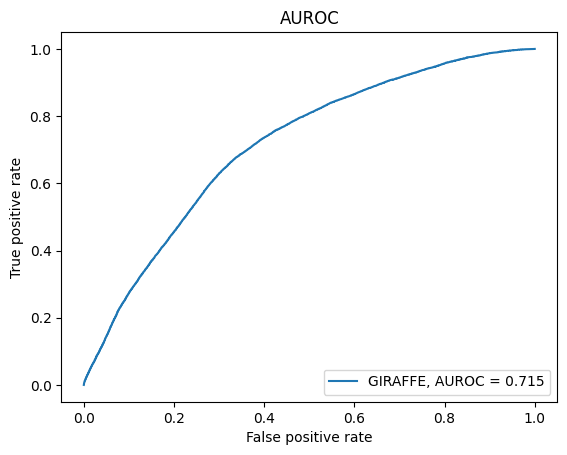

[0.715]

In [14]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), [R_giraffe.to_numpy().flatten()], ['GIRAFFE'])

### 2.2 OTTER [2]

In [6]:
if cache:
    R_otter = pd.read_csv("data/liver/R_otter.csv", index_col = 0)
else:
    start = time.time()
    R_otter = otter(motif.T.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), np.corrcoef(expression.to_numpy())).T
    end = time.time()
    print(end - start)
    pd.DataFrame(R_otter, index = motif.index, columns = motif.columns).to_csv("data/liver/R_otter.csv")

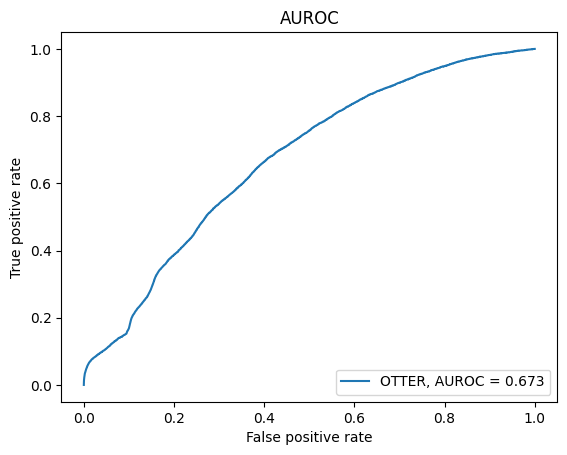

[0.673]

In [25]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), [a.to_numpy().flatten()], ['OTTER'])

### 2.3 PANDA [1]

In [7]:
R_panda_raw = pd.read_csv("data/liver/R_panda.csv", index_col = 0).T
R_panda = pd.DataFrame(0, index = motif.index, columns = motif.columns)
for g in R_panda_raw.index:
    for tf in R_panda_raw.columns:
        R_panda.at[g, tf] = R_panda_raw.at[g, tf]

### 2.4 Motif-based prior

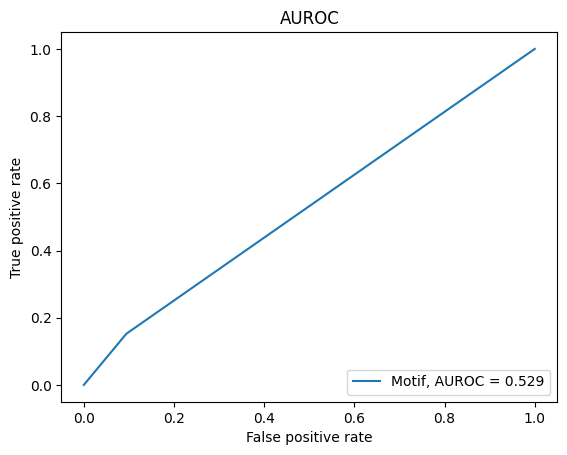

[0.529]

In [8]:
notebooks.plot_auroc(chip.to_numpy(), [motif.to_numpy().flatten()], ["Motif"])

### 2.5 GENIE3 [3]

In [8]:
start = time.time()
model = notebooks.GENIE3(expression.to_numpy().T, gene_names = list(expression.index) ,regulators = list(expression.index), ntrees=5)
end = time.time()
print(end - start)

Tree method: RF
K: sqrt
Number of trees: 5


running single threaded jobs
Gene 1/30243...
Gene 2/30243...
Gene 3/30243...
Gene 4/30243...
Gene 5/30243...
Gene 6/30243...
Gene 7/30243...
Gene 8/30243...
Gene 9/30243...
Gene 10/30243...
Gene 11/30243...
Gene 12/30243...
Gene 13/30243...
Gene 14/30243...
Gene 15/30243...
Gene 16/30243...
Gene 17/30243...
Gene 18/30243...
Gene 19/30243...
Gene 20/30243...
Gene 21/30243...
Gene 22/30243...
Gene 23/30243...
Gene 24/30243...
Gene 25/30243...
Gene 26/30243...
Gene 27/30243...
Gene 28/30243...
Gene 29/30243...
Gene 30/30243...
Gene 31/30243...
Gene 32/30243...
Gene 33/30243...
Gene 34/30243...
Gene 35/30243...
Gene 36/30243...
Gene 37/30243...
Gene 38/30243...
Gene 39/30243...
Gene 40/30243...
Gene 41/30243...
Gene 42/30243...
Gene 43/30243...
Gene 44/30243...
Gene 45/30243...
Gene 46/30243...
Gene 47/30243...
Gene 48/30243...
Gene 49/30243...
Gene 50/30243...
Gene 51/30243...
Gene 52/30243...
Gene 53/30243...
Gene 54/30243...
Gene 55/30243...


Gene 460/30243...
Gene 461/30243...
Gene 462/30243...
Gene 463/30243...
Gene 464/30243...
Gene 465/30243...
Gene 466/30243...
Gene 467/30243...
Gene 468/30243...
Gene 469/30243...
Gene 470/30243...
Gene 471/30243...
Gene 472/30243...
Gene 473/30243...
Gene 474/30243...
Gene 475/30243...
Gene 476/30243...
Gene 477/30243...
Gene 478/30243...
Gene 479/30243...
Gene 480/30243...
Gene 481/30243...
Gene 482/30243...
Gene 483/30243...
Gene 484/30243...
Gene 485/30243...
Gene 486/30243...
Gene 487/30243...
Gene 488/30243...
Gene 489/30243...
Gene 490/30243...
Gene 491/30243...
Gene 492/30243...
Gene 493/30243...
Gene 494/30243...
Gene 495/30243...
Gene 496/30243...
Gene 497/30243...
Gene 498/30243...
Gene 499/30243...
Gene 500/30243...
Gene 501/30243...
Gene 502/30243...
Gene 503/30243...
Gene 504/30243...
Gene 505/30243...
Gene 506/30243...
Gene 507/30243...
Gene 508/30243...
Gene 509/30243...
Gene 510/30243...
Gene 511/30243...
Gene 512/30243...
Gene 513/30243...
Gene 514/30243...
Gene 515/3

Gene 916/30243...
Gene 917/30243...
Gene 918/30243...
Gene 919/30243...
Gene 920/30243...
Gene 921/30243...
Gene 922/30243...
Gene 923/30243...
Gene 924/30243...
Gene 925/30243...
Gene 926/30243...
Gene 927/30243...
Gene 928/30243...
Gene 929/30243...
Gene 930/30243...
Gene 931/30243...
Gene 932/30243...
Gene 933/30243...
Gene 934/30243...
Gene 935/30243...
Gene 936/30243...
Gene 937/30243...
Gene 938/30243...
Gene 939/30243...
Gene 940/30243...
Gene 941/30243...
Gene 942/30243...
Gene 943/30243...
Gene 944/30243...
Gene 945/30243...
Gene 946/30243...
Gene 947/30243...
Gene 948/30243...
Gene 949/30243...
Gene 950/30243...
Gene 951/30243...
Gene 952/30243...
Gene 953/30243...
Gene 954/30243...
Gene 955/30243...
Gene 956/30243...
Gene 957/30243...
Gene 958/30243...
Gene 959/30243...
Gene 960/30243...
Gene 961/30243...
Gene 962/30243...
Gene 963/30243...
Gene 964/30243...
Gene 965/30243...
Gene 966/30243...
Gene 967/30243...
Gene 968/30243...
Gene 969/30243...
Gene 970/30243...
Gene 971/3

Gene 1354/30243...
Gene 1355/30243...
Gene 1356/30243...
Gene 1357/30243...
Gene 1358/30243...
Gene 1359/30243...
Gene 1360/30243...
Gene 1361/30243...
Gene 1362/30243...
Gene 1363/30243...
Gene 1364/30243...
Gene 1365/30243...
Gene 1366/30243...
Gene 1367/30243...
Gene 1368/30243...
Gene 1369/30243...
Gene 1370/30243...
Gene 1371/30243...
Gene 1372/30243...
Gene 1373/30243...
Gene 1374/30243...
Gene 1375/30243...
Gene 1376/30243...
Gene 1377/30243...
Gene 1378/30243...
Gene 1379/30243...
Gene 1380/30243...
Gene 1381/30243...
Gene 1382/30243...
Gene 1383/30243...
Gene 1384/30243...
Gene 1385/30243...
Gene 1386/30243...
Gene 1387/30243...
Gene 1388/30243...
Gene 1389/30243...
Gene 1390/30243...
Gene 1391/30243...
Gene 1392/30243...
Gene 1393/30243...
Gene 1394/30243...
Gene 1395/30243...
Gene 1396/30243...
Gene 1397/30243...
Gene 1398/30243...
Gene 1399/30243...
Gene 1400/30243...
Gene 1401/30243...
Gene 1402/30243...
Gene 1403/30243...
Gene 1404/30243...
Gene 1405/30243...
Gene 1406/30

Gene 1786/30243...
Gene 1787/30243...
Gene 1788/30243...
Gene 1789/30243...
Gene 1790/30243...
Gene 1791/30243...
Gene 1792/30243...
Gene 1793/30243...
Gene 1794/30243...
Gene 1795/30243...
Gene 1796/30243...
Gene 1797/30243...
Gene 1798/30243...
Gene 1799/30243...
Gene 1800/30243...
Gene 1801/30243...
Gene 1802/30243...
Gene 1803/30243...
Gene 1804/30243...
Gene 1805/30243...
Gene 1806/30243...
Gene 1807/30243...
Gene 1808/30243...
Gene 1809/30243...
Gene 1810/30243...
Gene 1811/30243...
Gene 1812/30243...
Gene 1813/30243...
Gene 1814/30243...
Gene 1815/30243...
Gene 1816/30243...
Gene 1817/30243...
Gene 1818/30243...
Gene 1819/30243...
Gene 1820/30243...
Gene 1821/30243...
Gene 1822/30243...
Gene 1823/30243...
Gene 1824/30243...
Gene 1825/30243...
Gene 1826/30243...
Gene 1827/30243...
Gene 1828/30243...
Gene 1829/30243...
Gene 1830/30243...
Gene 1831/30243...
Gene 1832/30243...
Gene 1833/30243...
Gene 1834/30243...
Gene 1835/30243...
Gene 1836/30243...
Gene 1837/30243...
Gene 1838/30

Gene 2218/30243...
Gene 2219/30243...
Gene 2220/30243...
Gene 2221/30243...
Gene 2222/30243...
Gene 2223/30243...
Gene 2224/30243...
Gene 2225/30243...
Gene 2226/30243...
Gene 2227/30243...
Gene 2228/30243...
Gene 2229/30243...
Gene 2230/30243...
Gene 2231/30243...
Gene 2232/30243...
Gene 2233/30243...
Gene 2234/30243...
Gene 2235/30243...
Gene 2236/30243...
Gene 2237/30243...
Gene 2238/30243...
Gene 2239/30243...
Gene 2240/30243...
Gene 2241/30243...
Gene 2242/30243...
Gene 2243/30243...
Gene 2244/30243...
Gene 2245/30243...
Gene 2246/30243...
Gene 2247/30243...
Gene 2248/30243...
Gene 2249/30243...
Gene 2250/30243...
Gene 2251/30243...
Gene 2252/30243...
Gene 2253/30243...
Gene 2254/30243...
Gene 2255/30243...
Gene 2256/30243...
Gene 2257/30243...
Gene 2258/30243...
Gene 2259/30243...
Gene 2260/30243...
Gene 2261/30243...
Gene 2262/30243...
Gene 2263/30243...
Gene 2264/30243...
Gene 2265/30243...
Gene 2266/30243...
Gene 2267/30243...
Gene 2268/30243...
Gene 2269/30243...
Gene 2270/30

Gene 2653/30243...
Gene 2654/30243...
Gene 2655/30243...
Gene 2656/30243...
Gene 2657/30243...
Gene 2658/30243...
Gene 2659/30243...
Gene 2660/30243...
Gene 2661/30243...
Gene 2662/30243...
Gene 2663/30243...
Gene 2664/30243...
Gene 2665/30243...
Gene 2666/30243...
Gene 2667/30243...
Gene 2668/30243...
Gene 2669/30243...
Gene 2670/30243...
Gene 2671/30243...
Gene 2672/30243...
Gene 2673/30243...
Gene 2674/30243...
Gene 2675/30243...
Gene 2676/30243...
Gene 2677/30243...
Gene 2678/30243...
Gene 2679/30243...
Gene 2680/30243...
Gene 2681/30243...
Gene 2682/30243...
Gene 2683/30243...
Gene 2684/30243...
Gene 2685/30243...
Gene 2686/30243...
Gene 2687/30243...
Gene 2688/30243...
Gene 2689/30243...
Gene 2690/30243...
Gene 2691/30243...
Gene 2692/30243...
Gene 2693/30243...
Gene 2694/30243...
Gene 2695/30243...
Gene 2696/30243...
Gene 2697/30243...
Gene 2698/30243...
Gene 2699/30243...
Gene 2700/30243...
Gene 2701/30243...
Gene 2702/30243...
Gene 2703/30243...
Gene 2704/30243...
Gene 2705/30

Gene 3090/30243...
Gene 3091/30243...
Gene 3092/30243...
Gene 3093/30243...
Gene 3094/30243...
Gene 3095/30243...
Gene 3096/30243...
Gene 3097/30243...
Gene 3098/30243...
Gene 3099/30243...
Gene 3100/30243...
Gene 3101/30243...
Gene 3102/30243...
Gene 3103/30243...
Gene 3104/30243...
Gene 3105/30243...
Gene 3106/30243...
Gene 3107/30243...
Gene 3108/30243...
Gene 3109/30243...
Gene 3110/30243...
Gene 3111/30243...
Gene 3112/30243...
Gene 3113/30243...
Gene 3114/30243...
Gene 3115/30243...
Gene 3116/30243...
Gene 3117/30243...
Gene 3118/30243...
Gene 3119/30243...
Gene 3120/30243...
Gene 3121/30243...
Gene 3122/30243...
Gene 3123/30243...
Gene 3124/30243...
Gene 3125/30243...
Gene 3126/30243...
Gene 3127/30243...
Gene 3128/30243...
Gene 3129/30243...
Gene 3130/30243...
Gene 3131/30243...
Gene 3132/30243...
Gene 3133/30243...
Gene 3134/30243...
Gene 3135/30243...
Gene 3136/30243...
Gene 3137/30243...
Gene 3138/30243...
Gene 3139/30243...
Gene 3140/30243...
Gene 3141/30243...
Gene 3142/30

Gene 3527/30243...
Gene 3528/30243...
Gene 3529/30243...
Gene 3530/30243...
Gene 3531/30243...
Gene 3532/30243...
Gene 3533/30243...
Gene 3534/30243...
Gene 3535/30243...
Gene 3536/30243...
Gene 3537/30243...
Gene 3538/30243...
Gene 3539/30243...
Gene 3540/30243...
Gene 3541/30243...
Gene 3542/30243...
Gene 3543/30243...
Gene 3544/30243...
Gene 3545/30243...
Gene 3546/30243...
Gene 3547/30243...
Gene 3548/30243...
Gene 3549/30243...
Gene 3550/30243...
Gene 3551/30243...
Gene 3552/30243...
Gene 3553/30243...
Gene 3554/30243...
Gene 3555/30243...
Gene 3556/30243...
Gene 3557/30243...
Gene 3558/30243...
Gene 3559/30243...
Gene 3560/30243...
Gene 3561/30243...
Gene 3562/30243...
Gene 3563/30243...
Gene 3564/30243...
Gene 3565/30243...
Gene 3566/30243...
Gene 3567/30243...
Gene 3568/30243...
Gene 3569/30243...
Gene 3570/30243...
Gene 3571/30243...
Gene 3572/30243...
Gene 3573/30243...
Gene 3574/30243...
Gene 3575/30243...
Gene 3576/30243...
Gene 3577/30243...
Gene 3578/30243...
Gene 3579/30

Gene 3959/30243...
Gene 3960/30243...
Gene 3961/30243...
Gene 3962/30243...
Gene 3963/30243...
Gene 3964/30243...
Gene 3965/30243...
Gene 3966/30243...
Gene 3967/30243...
Gene 3968/30243...
Gene 3969/30243...
Gene 3970/30243...
Gene 3971/30243...
Gene 3972/30243...
Gene 3973/30243...
Gene 3974/30243...
Gene 3975/30243...
Gene 3976/30243...
Gene 3977/30243...
Gene 3978/30243...
Gene 3979/30243...
Gene 3980/30243...
Gene 3981/30243...
Gene 3982/30243...
Gene 3983/30243...
Gene 3984/30243...
Gene 3985/30243...
Gene 3986/30243...
Gene 3987/30243...
Gene 3988/30243...
Gene 3989/30243...
Gene 3990/30243...
Gene 3991/30243...
Gene 3992/30243...
Gene 3993/30243...
Gene 3994/30243...
Gene 3995/30243...
Gene 3996/30243...
Gene 3997/30243...
Gene 3998/30243...
Gene 3999/30243...
Gene 4000/30243...
Gene 4001/30243...
Gene 4002/30243...
Gene 4003/30243...
Gene 4004/30243...
Gene 4005/30243...
Gene 4006/30243...
Gene 4007/30243...
Gene 4008/30243...
Gene 4009/30243...
Gene 4010/30243...
Gene 4011/30

Gene 4395/30243...
Gene 4396/30243...
Gene 4397/30243...
Gene 4398/30243...
Gene 4399/30243...
Gene 4400/30243...
Gene 4401/30243...
Gene 4402/30243...
Gene 4403/30243...
Gene 4404/30243...
Gene 4405/30243...
Gene 4406/30243...
Gene 4407/30243...
Gene 4408/30243...
Gene 4409/30243...
Gene 4410/30243...
Gene 4411/30243...
Gene 4412/30243...
Gene 4413/30243...
Gene 4414/30243...
Gene 4415/30243...
Gene 4416/30243...
Gene 4417/30243...
Gene 4418/30243...
Gene 4419/30243...
Gene 4420/30243...
Gene 4421/30243...
Gene 4422/30243...
Gene 4423/30243...
Gene 4424/30243...
Gene 4425/30243...
Gene 4426/30243...
Gene 4427/30243...
Gene 4428/30243...
Gene 4429/30243...
Gene 4430/30243...
Gene 4431/30243...
Gene 4432/30243...
Gene 4433/30243...
Gene 4434/30243...
Gene 4435/30243...
Gene 4436/30243...
Gene 4437/30243...
Gene 4438/30243...
Gene 4439/30243...
Gene 4440/30243...
Gene 4441/30243...
Gene 4442/30243...
Gene 4443/30243...
Gene 4444/30243...
Gene 4445/30243...
Gene 4446/30243...
Gene 4447/30

Gene 4831/30243...
Gene 4832/30243...
Gene 4833/30243...
Gene 4834/30243...
Gene 4835/30243...
Gene 4836/30243...
Gene 4837/30243...
Gene 4838/30243...
Gene 4839/30243...
Gene 4840/30243...
Gene 4841/30243...
Gene 4842/30243...
Gene 4843/30243...
Gene 4844/30243...
Gene 4845/30243...
Gene 4846/30243...
Gene 4847/30243...
Gene 4848/30243...
Gene 4849/30243...
Gene 4850/30243...
Gene 4851/30243...
Gene 4852/30243...
Gene 4853/30243...
Gene 4854/30243...
Gene 4855/30243...
Gene 4856/30243...
Gene 4857/30243...
Gene 4858/30243...
Gene 4859/30243...
Gene 4860/30243...
Gene 4861/30243...
Gene 4862/30243...
Gene 4863/30243...
Gene 4864/30243...
Gene 4865/30243...
Gene 4866/30243...
Gene 4867/30243...
Gene 4868/30243...
Gene 4869/30243...
Gene 4870/30243...
Gene 4871/30243...
Gene 4872/30243...
Gene 4873/30243...
Gene 4874/30243...
Gene 4875/30243...
Gene 4876/30243...
Gene 4877/30243...
Gene 4878/30243...
Gene 4879/30243...
Gene 4880/30243...
Gene 4881/30243...
Gene 4882/30243...
Gene 4883/30

Gene 5267/30243...
Gene 5268/30243...
Gene 5269/30243...
Gene 5270/30243...
Gene 5271/30243...
Gene 5272/30243...
Gene 5273/30243...
Gene 5274/30243...
Gene 5275/30243...
Gene 5276/30243...
Gene 5277/30243...
Gene 5278/30243...
Gene 5279/30243...
Gene 5280/30243...
Gene 5281/30243...
Gene 5282/30243...
Gene 5283/30243...
Gene 5284/30243...
Gene 5285/30243...
Gene 5286/30243...
Gene 5287/30243...
Gene 5288/30243...
Gene 5289/30243...
Gene 5290/30243...
Gene 5291/30243...
Gene 5292/30243...
Gene 5293/30243...
Gene 5294/30243...
Gene 5295/30243...
Gene 5296/30243...
Gene 5297/30243...
Gene 5298/30243...
Gene 5299/30243...
Gene 5300/30243...
Gene 5301/30243...
Gene 5302/30243...
Gene 5303/30243...
Gene 5304/30243...
Gene 5305/30243...
Gene 5306/30243...
Gene 5307/30243...
Gene 5308/30243...
Gene 5309/30243...
Gene 5310/30243...
Gene 5311/30243...
Gene 5312/30243...
Gene 5313/30243...
Gene 5314/30243...
Gene 5315/30243...
Gene 5316/30243...
Gene 5317/30243...
Gene 5318/30243...
Gene 5319/30

Gene 5699/30243...
Gene 5700/30243...
Gene 5701/30243...
Gene 5702/30243...
Gene 5703/30243...
Gene 5704/30243...
Gene 5705/30243...
Gene 5706/30243...
Gene 5707/30243...
Gene 5708/30243...
Gene 5709/30243...
Gene 5710/30243...
Gene 5711/30243...
Gene 5712/30243...
Gene 5713/30243...
Gene 5714/30243...
Gene 5715/30243...
Gene 5716/30243...
Gene 5717/30243...
Gene 5718/30243...
Gene 5719/30243...
Gene 5720/30243...
Gene 5721/30243...
Gene 5722/30243...
Gene 5723/30243...
Gene 5724/30243...
Gene 5725/30243...
Gene 5726/30243...
Gene 5727/30243...
Gene 5728/30243...
Gene 5729/30243...
Gene 5730/30243...
Gene 5731/30243...
Gene 5732/30243...
Gene 5733/30243...
Gene 5734/30243...
Gene 5735/30243...
Gene 5736/30243...
Gene 5737/30243...
Gene 5738/30243...
Gene 5739/30243...
Gene 5740/30243...
Gene 5741/30243...
Gene 5742/30243...
Gene 5743/30243...
Gene 5744/30243...
Gene 5745/30243...
Gene 5746/30243...
Gene 5747/30243...
Gene 5748/30243...
Gene 5749/30243...
Gene 5750/30243...
Gene 5751/30

Gene 6132/30243...
Gene 6133/30243...
Gene 6134/30243...
Gene 6135/30243...
Gene 6136/30243...
Gene 6137/30243...
Gene 6138/30243...
Gene 6139/30243...
Gene 6140/30243...
Gene 6141/30243...
Gene 6142/30243...
Gene 6143/30243...
Gene 6144/30243...
Gene 6145/30243...
Gene 6146/30243...
Gene 6147/30243...
Gene 6148/30243...
Gene 6149/30243...
Gene 6150/30243...
Gene 6151/30243...
Gene 6152/30243...
Gene 6153/30243...
Gene 6154/30243...
Gene 6155/30243...
Gene 6156/30243...
Gene 6157/30243...
Gene 6158/30243...
Gene 6159/30243...
Gene 6160/30243...
Gene 6161/30243...
Gene 6162/30243...
Gene 6163/30243...
Gene 6164/30243...
Gene 6165/30243...
Gene 6166/30243...
Gene 6167/30243...
Gene 6168/30243...
Gene 6169/30243...
Gene 6170/30243...
Gene 6171/30243...
Gene 6172/30243...
Gene 6173/30243...
Gene 6174/30243...
Gene 6175/30243...
Gene 6176/30243...
Gene 6177/30243...
Gene 6178/30243...
Gene 6179/30243...
Gene 6180/30243...
Gene 6181/30243...
Gene 6182/30243...
Gene 6183/30243...
Gene 6184/30

Gene 6564/30243...
Gene 6565/30243...
Gene 6566/30243...
Gene 6567/30243...
Gene 6568/30243...
Gene 6569/30243...
Gene 6570/30243...
Gene 6571/30243...
Gene 6572/30243...
Gene 6573/30243...
Gene 6574/30243...
Gene 6575/30243...
Gene 6576/30243...
Gene 6577/30243...
Gene 6578/30243...
Gene 6579/30243...
Gene 6580/30243...
Gene 6581/30243...
Gene 6582/30243...
Gene 6583/30243...
Gene 6584/30243...
Gene 6585/30243...
Gene 6586/30243...
Gene 6587/30243...
Gene 6588/30243...
Gene 6589/30243...
Gene 6590/30243...
Gene 6591/30243...
Gene 6592/30243...
Gene 6593/30243...
Gene 6594/30243...
Gene 6595/30243...
Gene 6596/30243...
Gene 6597/30243...
Gene 6598/30243...
Gene 6599/30243...
Gene 6600/30243...
Gene 6601/30243...
Gene 6602/30243...
Gene 6603/30243...
Gene 6604/30243...
Gene 6605/30243...
Gene 6606/30243...
Gene 6607/30243...
Gene 6608/30243...
Gene 6609/30243...
Gene 6610/30243...
Gene 6611/30243...
Gene 6612/30243...
Gene 6613/30243...
Gene 6614/30243...
Gene 6615/30243...
Gene 6616/30

Gene 7000/30243...
Gene 7001/30243...
Gene 7002/30243...
Gene 7003/30243...
Gene 7004/30243...
Gene 7005/30243...
Gene 7006/30243...
Gene 7007/30243...
Gene 7008/30243...
Gene 7009/30243...
Gene 7010/30243...
Gene 7011/30243...
Gene 7012/30243...
Gene 7013/30243...
Gene 7014/30243...
Gene 7015/30243...
Gene 7016/30243...
Gene 7017/30243...
Gene 7018/30243...
Gene 7019/30243...
Gene 7020/30243...
Gene 7021/30243...
Gene 7022/30243...
Gene 7023/30243...
Gene 7024/30243...
Gene 7025/30243...
Gene 7026/30243...
Gene 7027/30243...
Gene 7028/30243...
Gene 7029/30243...
Gene 7030/30243...
Gene 7031/30243...
Gene 7032/30243...
Gene 7033/30243...
Gene 7034/30243...
Gene 7035/30243...
Gene 7036/30243...
Gene 7037/30243...
Gene 7038/30243...
Gene 7039/30243...
Gene 7040/30243...
Gene 7041/30243...
Gene 7042/30243...
Gene 7043/30243...
Gene 7044/30243...
Gene 7045/30243...
Gene 7046/30243...
Gene 7047/30243...
Gene 7048/30243...
Gene 7049/30243...
Gene 7050/30243...
Gene 7051/30243...
Gene 7052/30

Gene 7436/30243...
Gene 7437/30243...
Gene 7438/30243...
Gene 7439/30243...
Gene 7440/30243...
Gene 7441/30243...
Gene 7442/30243...
Gene 7443/30243...
Gene 7444/30243...
Gene 7445/30243...
Gene 7446/30243...
Gene 7447/30243...
Gene 7448/30243...
Gene 7449/30243...
Gene 7450/30243...
Gene 7451/30243...
Gene 7452/30243...
Gene 7453/30243...
Gene 7454/30243...
Gene 7455/30243...
Gene 7456/30243...
Gene 7457/30243...
Gene 7458/30243...
Gene 7459/30243...
Gene 7460/30243...
Gene 7461/30243...
Gene 7462/30243...
Gene 7463/30243...
Gene 7464/30243...
Gene 7465/30243...
Gene 7466/30243...
Gene 7467/30243...
Gene 7468/30243...
Gene 7469/30243...
Gene 7470/30243...
Gene 7471/30243...
Gene 7472/30243...
Gene 7473/30243...
Gene 7474/30243...
Gene 7475/30243...
Gene 7476/30243...
Gene 7477/30243...
Gene 7478/30243...
Gene 7479/30243...
Gene 7480/30243...
Gene 7481/30243...
Gene 7482/30243...
Gene 7483/30243...
Gene 7484/30243...
Gene 7485/30243...
Gene 7486/30243...
Gene 7487/30243...
Gene 7488/30

Gene 7873/30243...
Gene 7874/30243...
Gene 7875/30243...
Gene 7876/30243...
Gene 7877/30243...
Gene 7878/30243...
Gene 7879/30243...
Gene 7880/30243...
Gene 7881/30243...
Gene 7882/30243...
Gene 7883/30243...
Gene 7884/30243...
Gene 7885/30243...
Gene 7886/30243...
Gene 7887/30243...
Gene 7888/30243...
Gene 7889/30243...
Gene 7890/30243...
Gene 7891/30243...
Gene 7892/30243...
Gene 7893/30243...
Gene 7894/30243...
Gene 7895/30243...
Gene 7896/30243...
Gene 7897/30243...
Gene 7898/30243...
Gene 7899/30243...
Gene 7900/30243...
Gene 7901/30243...
Gene 7902/30243...
Gene 7903/30243...
Gene 7904/30243...
Gene 7905/30243...
Gene 7906/30243...
Gene 7907/30243...
Gene 7908/30243...
Gene 7909/30243...
Gene 7910/30243...
Gene 7911/30243...
Gene 7912/30243...
Gene 7913/30243...
Gene 7914/30243...
Gene 7915/30243...
Gene 7916/30243...
Gene 7917/30243...
Gene 7918/30243...
Gene 7919/30243...
Gene 7920/30243...
Gene 7921/30243...
Gene 7922/30243...
Gene 7923/30243...
Gene 7924/30243...
Gene 7925/30

Gene 8307/30243...
Gene 8308/30243...
Gene 8309/30243...
Gene 8310/30243...
Gene 8311/30243...
Gene 8312/30243...
Gene 8313/30243...
Gene 8314/30243...
Gene 8315/30243...
Gene 8316/30243...
Gene 8317/30243...
Gene 8318/30243...
Gene 8319/30243...
Gene 8320/30243...
Gene 8321/30243...
Gene 8322/30243...
Gene 8323/30243...
Gene 8324/30243...
Gene 8325/30243...
Gene 8326/30243...
Gene 8327/30243...
Gene 8328/30243...
Gene 8329/30243...
Gene 8330/30243...
Gene 8331/30243...
Gene 8332/30243...
Gene 8333/30243...
Gene 8334/30243...
Gene 8335/30243...
Gene 8336/30243...
Gene 8337/30243...
Gene 8338/30243...
Gene 8339/30243...
Gene 8340/30243...
Gene 8341/30243...
Gene 8342/30243...
Gene 8343/30243...
Gene 8344/30243...
Gene 8345/30243...
Gene 8346/30243...
Gene 8347/30243...
Gene 8348/30243...
Gene 8349/30243...
Gene 8350/30243...
Gene 8351/30243...
Gene 8352/30243...
Gene 8353/30243...
Gene 8354/30243...
Gene 8355/30243...
Gene 8356/30243...
Gene 8357/30243...
Gene 8358/30243...
Gene 8359/30

Gene 8743/30243...
Gene 8744/30243...
Gene 8745/30243...
Gene 8746/30243...
Gene 8747/30243...
Gene 8748/30243...
Gene 8749/30243...
Gene 8750/30243...
Gene 8751/30243...
Gene 8752/30243...
Gene 8753/30243...
Gene 8754/30243...
Gene 8755/30243...
Gene 8756/30243...
Gene 8757/30243...
Gene 8758/30243...
Gene 8759/30243...
Gene 8760/30243...
Gene 8761/30243...
Gene 8762/30243...
Gene 8763/30243...
Gene 8764/30243...
Gene 8765/30243...
Gene 8766/30243...
Gene 8767/30243...
Gene 8768/30243...
Gene 8769/30243...
Gene 8770/30243...
Gene 8771/30243...
Gene 8772/30243...
Gene 8773/30243...
Gene 8774/30243...
Gene 8775/30243...
Gene 8776/30243...
Gene 8777/30243...
Gene 8778/30243...
Gene 8779/30243...
Gene 8780/30243...
Gene 8781/30243...
Gene 8782/30243...
Gene 8783/30243...
Gene 8784/30243...
Gene 8785/30243...
Gene 8786/30243...
Gene 8787/30243...
Gene 8788/30243...
Gene 8789/30243...
Gene 8790/30243...
Gene 8791/30243...
Gene 8792/30243...
Gene 8793/30243...
Gene 8794/30243...
Gene 8795/30

Gene 9178/30243...
Gene 9179/30243...
Gene 9180/30243...
Gene 9181/30243...
Gene 9182/30243...
Gene 9183/30243...
Gene 9184/30243...
Gene 9185/30243...
Gene 9186/30243...
Gene 9187/30243...
Gene 9188/30243...
Gene 9189/30243...
Gene 9190/30243...
Gene 9191/30243...
Gene 9192/30243...
Gene 9193/30243...
Gene 9194/30243...
Gene 9195/30243...
Gene 9196/30243...
Gene 9197/30243...
Gene 9198/30243...
Gene 9199/30243...
Gene 9200/30243...
Gene 9201/30243...
Gene 9202/30243...
Gene 9203/30243...
Gene 9204/30243...
Gene 9205/30243...
Gene 9206/30243...
Gene 9207/30243...
Gene 9208/30243...
Gene 9209/30243...
Gene 9210/30243...
Gene 9211/30243...
Gene 9212/30243...
Gene 9213/30243...
Gene 9214/30243...
Gene 9215/30243...
Gene 9216/30243...
Gene 9217/30243...
Gene 9218/30243...
Gene 9219/30243...
Gene 9220/30243...
Gene 9221/30243...
Gene 9222/30243...
Gene 9223/30243...
Gene 9224/30243...
Gene 9225/30243...
Gene 9226/30243...
Gene 9227/30243...
Gene 9228/30243...
Gene 9229/30243...
Gene 9230/30

Gene 9614/30243...
Gene 9615/30243...
Gene 9616/30243...
Gene 9617/30243...
Gene 9618/30243...
Gene 9619/30243...
Gene 9620/30243...
Gene 9621/30243...
Gene 9622/30243...
Gene 9623/30243...
Gene 9624/30243...
Gene 9625/30243...
Gene 9626/30243...
Gene 9627/30243...
Gene 9628/30243...
Gene 9629/30243...
Gene 9630/30243...
Gene 9631/30243...
Gene 9632/30243...
Gene 9633/30243...
Gene 9634/30243...
Gene 9635/30243...
Gene 9636/30243...
Gene 9637/30243...
Gene 9638/30243...
Gene 9639/30243...
Gene 9640/30243...
Gene 9641/30243...
Gene 9642/30243...
Gene 9643/30243...
Gene 9644/30243...
Gene 9645/30243...
Gene 9646/30243...
Gene 9647/30243...
Gene 9648/30243...
Gene 9649/30243...
Gene 9650/30243...
Gene 9651/30243...
Gene 9652/30243...
Gene 9653/30243...
Gene 9654/30243...
Gene 9655/30243...
Gene 9656/30243...
Gene 9657/30243...
Gene 9658/30243...
Gene 9659/30243...
Gene 9660/30243...
Gene 9661/30243...
Gene 9662/30243...
Gene 9663/30243...
Gene 9664/30243...
Gene 9665/30243...
Gene 9666/30

Gene 10046/30243...
Gene 10047/30243...
Gene 10048/30243...
Gene 10049/30243...
Gene 10050/30243...
Gene 10051/30243...
Gene 10052/30243...
Gene 10053/30243...
Gene 10054/30243...
Gene 10055/30243...
Gene 10056/30243...
Gene 10057/30243...
Gene 10058/30243...
Gene 10059/30243...
Gene 10060/30243...
Gene 10061/30243...
Gene 10062/30243...
Gene 10063/30243...
Gene 10064/30243...
Gene 10065/30243...
Gene 10066/30243...
Gene 10067/30243...
Gene 10068/30243...
Gene 10069/30243...
Gene 10070/30243...
Gene 10071/30243...
Gene 10072/30243...
Gene 10073/30243...
Gene 10074/30243...
Gene 10075/30243...
Gene 10076/30243...
Gene 10077/30243...
Gene 10078/30243...
Gene 10079/30243...
Gene 10080/30243...
Gene 10081/30243...
Gene 10082/30243...
Gene 10083/30243...
Gene 10084/30243...
Gene 10085/30243...
Gene 10086/30243...
Gene 10087/30243...
Gene 10088/30243...
Gene 10089/30243...
Gene 10090/30243...
Gene 10091/30243...
Gene 10092/30243...
Gene 10093/30243...
Gene 10094/30243...
Gene 10095/30243...


Gene 10456/30243...
Gene 10457/30243...
Gene 10458/30243...
Gene 10459/30243...
Gene 10460/30243...
Gene 10461/30243...
Gene 10462/30243...
Gene 10463/30243...
Gene 10464/30243...
Gene 10465/30243...
Gene 10466/30243...
Gene 10467/30243...
Gene 10468/30243...
Gene 10469/30243...
Gene 10470/30243...
Gene 10471/30243...
Gene 10472/30243...
Gene 10473/30243...
Gene 10474/30243...
Gene 10475/30243...
Gene 10476/30243...
Gene 10477/30243...
Gene 10478/30243...
Gene 10479/30243...
Gene 10480/30243...
Gene 10481/30243...
Gene 10482/30243...
Gene 10483/30243...
Gene 10484/30243...
Gene 10485/30243...
Gene 10486/30243...
Gene 10487/30243...
Gene 10488/30243...
Gene 10489/30243...
Gene 10490/30243...
Gene 10491/30243...
Gene 10492/30243...
Gene 10493/30243...
Gene 10494/30243...
Gene 10495/30243...
Gene 10496/30243...
Gene 10497/30243...
Gene 10498/30243...
Gene 10499/30243...
Gene 10500/30243...
Gene 10501/30243...
Gene 10502/30243...
Gene 10503/30243...
Gene 10504/30243...
Gene 10505/30243...


Gene 10866/30243...
Gene 10867/30243...
Gene 10868/30243...
Gene 10869/30243...
Gene 10870/30243...
Gene 10871/30243...
Gene 10872/30243...
Gene 10873/30243...
Gene 10874/30243...
Gene 10875/30243...
Gene 10876/30243...
Gene 10877/30243...
Gene 10878/30243...
Gene 10879/30243...
Gene 10880/30243...
Gene 10881/30243...
Gene 10882/30243...
Gene 10883/30243...
Gene 10884/30243...
Gene 10885/30243...
Gene 10886/30243...
Gene 10887/30243...
Gene 10888/30243...
Gene 10889/30243...
Gene 10890/30243...
Gene 10891/30243...
Gene 10892/30243...
Gene 10893/30243...
Gene 10894/30243...
Gene 10895/30243...
Gene 10896/30243...
Gene 10897/30243...
Gene 10898/30243...
Gene 10899/30243...
Gene 10900/30243...
Gene 10901/30243...
Gene 10902/30243...
Gene 10903/30243...
Gene 10904/30243...
Gene 10905/30243...
Gene 10906/30243...
Gene 10907/30243...
Gene 10908/30243...
Gene 10909/30243...
Gene 10910/30243...
Gene 10911/30243...
Gene 10912/30243...
Gene 10913/30243...
Gene 10914/30243...
Gene 10915/30243...


Gene 11278/30243...
Gene 11279/30243...
Gene 11280/30243...
Gene 11281/30243...
Gene 11282/30243...
Gene 11283/30243...
Gene 11284/30243...
Gene 11285/30243...
Gene 11286/30243...
Gene 11287/30243...
Gene 11288/30243...
Gene 11289/30243...
Gene 11290/30243...
Gene 11291/30243...
Gene 11292/30243...
Gene 11293/30243...
Gene 11294/30243...
Gene 11295/30243...
Gene 11296/30243...
Gene 11297/30243...
Gene 11298/30243...
Gene 11299/30243...
Gene 11300/30243...
Gene 11301/30243...
Gene 11302/30243...
Gene 11303/30243...
Gene 11304/30243...
Gene 11305/30243...
Gene 11306/30243...
Gene 11307/30243...
Gene 11308/30243...
Gene 11309/30243...
Gene 11310/30243...
Gene 11311/30243...
Gene 11312/30243...
Gene 11313/30243...
Gene 11314/30243...
Gene 11315/30243...
Gene 11316/30243...
Gene 11317/30243...
Gene 11318/30243...
Gene 11319/30243...
Gene 11320/30243...
Gene 11321/30243...
Gene 11322/30243...
Gene 11323/30243...
Gene 11324/30243...
Gene 11325/30243...
Gene 11326/30243...
Gene 11327/30243...


Gene 11691/30243...
Gene 11692/30243...
Gene 11693/30243...
Gene 11694/30243...
Gene 11695/30243...
Gene 11696/30243...
Gene 11697/30243...
Gene 11698/30243...
Gene 11699/30243...
Gene 11700/30243...
Gene 11701/30243...
Gene 11702/30243...
Gene 11703/30243...
Gene 11704/30243...
Gene 11705/30243...
Gene 11706/30243...
Gene 11707/30243...
Gene 11708/30243...
Gene 11709/30243...
Gene 11710/30243...
Gene 11711/30243...
Gene 11712/30243...
Gene 11713/30243...
Gene 11714/30243...
Gene 11715/30243...
Gene 11716/30243...
Gene 11717/30243...
Gene 11718/30243...
Gene 11719/30243...
Gene 11720/30243...
Gene 11721/30243...
Gene 11722/30243...
Gene 11723/30243...
Gene 11724/30243...
Gene 11725/30243...
Gene 11726/30243...
Gene 11727/30243...
Gene 11728/30243...
Gene 11729/30243...
Gene 11730/30243...
Gene 11731/30243...
Gene 11732/30243...
Gene 11733/30243...
Gene 11734/30243...
Gene 11735/30243...
Gene 11736/30243...
Gene 11737/30243...
Gene 11738/30243...
Gene 11739/30243...
Gene 11740/30243...


Gene 12101/30243...
Gene 12102/30243...
Gene 12103/30243...
Gene 12104/30243...
Gene 12105/30243...
Gene 12106/30243...
Gene 12107/30243...
Gene 12108/30243...
Gene 12109/30243...
Gene 12110/30243...
Gene 12111/30243...
Gene 12112/30243...
Gene 12113/30243...
Gene 12114/30243...
Gene 12115/30243...
Gene 12116/30243...
Gene 12117/30243...
Gene 12118/30243...
Gene 12119/30243...
Gene 12120/30243...
Gene 12121/30243...
Gene 12122/30243...
Gene 12123/30243...
Gene 12124/30243...
Gene 12125/30243...
Gene 12126/30243...
Gene 12127/30243...
Gene 12128/30243...
Gene 12129/30243...
Gene 12130/30243...
Gene 12131/30243...
Gene 12132/30243...
Gene 12133/30243...
Gene 12134/30243...
Gene 12135/30243...
Gene 12136/30243...
Gene 12137/30243...
Gene 12138/30243...
Gene 12139/30243...
Gene 12140/30243...
Gene 12141/30243...
Gene 12142/30243...
Gene 12143/30243...
Gene 12144/30243...
Gene 12145/30243...
Gene 12146/30243...
Gene 12147/30243...
Gene 12148/30243...
Gene 12149/30243...
Gene 12150/30243...


Gene 12514/30243...
Gene 12515/30243...
Gene 12516/30243...
Gene 12517/30243...
Gene 12518/30243...
Gene 12519/30243...
Gene 12520/30243...
Gene 12521/30243...
Gene 12522/30243...
Gene 12523/30243...
Gene 12524/30243...
Gene 12525/30243...
Gene 12526/30243...
Gene 12527/30243...
Gene 12528/30243...
Gene 12529/30243...
Gene 12530/30243...
Gene 12531/30243...
Gene 12532/30243...
Gene 12533/30243...
Gene 12534/30243...
Gene 12535/30243...
Gene 12536/30243...
Gene 12537/30243...
Gene 12538/30243...
Gene 12539/30243...
Gene 12540/30243...
Gene 12541/30243...
Gene 12542/30243...
Gene 12543/30243...
Gene 12544/30243...
Gene 12545/30243...
Gene 12546/30243...
Gene 12547/30243...
Gene 12548/30243...
Gene 12549/30243...
Gene 12550/30243...
Gene 12551/30243...
Gene 12552/30243...
Gene 12553/30243...
Gene 12554/30243...
Gene 12555/30243...
Gene 12556/30243...
Gene 12557/30243...
Gene 12558/30243...
Gene 12559/30243...
Gene 12560/30243...
Gene 12561/30243...
Gene 12562/30243...
Gene 12563/30243...


Gene 12928/30243...
Gene 12929/30243...
Gene 12930/30243...
Gene 12931/30243...
Gene 12932/30243...
Gene 12933/30243...
Gene 12934/30243...
Gene 12935/30243...
Gene 12936/30243...
Gene 12937/30243...
Gene 12938/30243...
Gene 12939/30243...
Gene 12940/30243...
Gene 12941/30243...
Gene 12942/30243...
Gene 12943/30243...
Gene 12944/30243...
Gene 12945/30243...
Gene 12946/30243...
Gene 12947/30243...
Gene 12948/30243...
Gene 12949/30243...
Gene 12950/30243...
Gene 12951/30243...
Gene 12952/30243...
Gene 12953/30243...
Gene 12954/30243...
Gene 12955/30243...
Gene 12956/30243...
Gene 12957/30243...
Gene 12958/30243...
Gene 12959/30243...
Gene 12960/30243...
Gene 12961/30243...
Gene 12962/30243...
Gene 12963/30243...
Gene 12964/30243...
Gene 12965/30243...
Gene 12966/30243...
Gene 12967/30243...
Gene 12968/30243...
Gene 12969/30243...
Gene 12970/30243...
Gene 12971/30243...
Gene 12972/30243...
Gene 12973/30243...
Gene 12974/30243...
Gene 12975/30243...
Gene 12976/30243...
Gene 12977/30243...


Gene 13342/30243...
Gene 13343/30243...
Gene 13344/30243...
Gene 13345/30243...
Gene 13346/30243...
Gene 13347/30243...
Gene 13348/30243...
Gene 13349/30243...
Gene 13350/30243...
Gene 13351/30243...
Gene 13352/30243...
Gene 13353/30243...
Gene 13354/30243...
Gene 13355/30243...
Gene 13356/30243...
Gene 13357/30243...
Gene 13358/30243...
Gene 13359/30243...
Gene 13360/30243...
Gene 13361/30243...
Gene 13362/30243...
Gene 13363/30243...
Gene 13364/30243...
Gene 13365/30243...
Gene 13366/30243...
Gene 13367/30243...
Gene 13368/30243...
Gene 13369/30243...
Gene 13370/30243...
Gene 13371/30243...
Gene 13372/30243...
Gene 13373/30243...
Gene 13374/30243...
Gene 13375/30243...
Gene 13376/30243...
Gene 13377/30243...
Gene 13378/30243...
Gene 13379/30243...
Gene 13380/30243...
Gene 13381/30243...
Gene 13382/30243...
Gene 13383/30243...
Gene 13384/30243...
Gene 13385/30243...
Gene 13386/30243...
Gene 13387/30243...
Gene 13388/30243...
Gene 13389/30243...
Gene 13390/30243...
Gene 13391/30243...


Gene 13754/30243...
Gene 13755/30243...
Gene 13756/30243...
Gene 13757/30243...
Gene 13758/30243...
Gene 13759/30243...
Gene 13760/30243...
Gene 13761/30243...
Gene 13762/30243...
Gene 13763/30243...
Gene 13764/30243...
Gene 13765/30243...
Gene 13766/30243...
Gene 13767/30243...
Gene 13768/30243...
Gene 13769/30243...
Gene 13770/30243...
Gene 13771/30243...
Gene 13772/30243...
Gene 13773/30243...
Gene 13774/30243...
Gene 13775/30243...
Gene 13776/30243...
Gene 13777/30243...
Gene 13778/30243...
Gene 13779/30243...
Gene 13780/30243...
Gene 13781/30243...
Gene 13782/30243...
Gene 13783/30243...
Gene 13784/30243...
Gene 13785/30243...
Gene 13786/30243...
Gene 13787/30243...
Gene 13788/30243...
Gene 13789/30243...
Gene 13790/30243...
Gene 13791/30243...
Gene 13792/30243...
Gene 13793/30243...
Gene 13794/30243...
Gene 13795/30243...
Gene 13796/30243...
Gene 13797/30243...
Gene 13798/30243...
Gene 13799/30243...
Gene 13800/30243...
Gene 13801/30243...
Gene 13802/30243...
Gene 13803/30243...


Gene 14165/30243...
Gene 14166/30243...
Gene 14167/30243...
Gene 14168/30243...
Gene 14169/30243...
Gene 14170/30243...
Gene 14171/30243...
Gene 14172/30243...
Gene 14173/30243...
Gene 14174/30243...
Gene 14175/30243...
Gene 14176/30243...
Gene 14177/30243...
Gene 14178/30243...
Gene 14179/30243...
Gene 14180/30243...
Gene 14181/30243...
Gene 14182/30243...
Gene 14183/30243...
Gene 14184/30243...
Gene 14185/30243...
Gene 14186/30243...
Gene 14187/30243...
Gene 14188/30243...
Gene 14189/30243...
Gene 14190/30243...
Gene 14191/30243...
Gene 14192/30243...
Gene 14193/30243...
Gene 14194/30243...
Gene 14195/30243...
Gene 14196/30243...
Gene 14197/30243...
Gene 14198/30243...
Gene 14199/30243...
Gene 14200/30243...
Gene 14201/30243...
Gene 14202/30243...
Gene 14203/30243...
Gene 14204/30243...
Gene 14205/30243...
Gene 14206/30243...
Gene 14207/30243...
Gene 14208/30243...
Gene 14209/30243...
Gene 14210/30243...
Gene 14211/30243...
Gene 14212/30243...
Gene 14213/30243...
Gene 14214/30243...


Gene 14576/30243...
Gene 14577/30243...
Gene 14578/30243...
Gene 14579/30243...
Gene 14580/30243...
Gene 14581/30243...
Gene 14582/30243...
Gene 14583/30243...
Gene 14584/30243...
Gene 14585/30243...
Gene 14586/30243...
Gene 14587/30243...
Gene 14588/30243...
Gene 14589/30243...
Gene 14590/30243...
Gene 14591/30243...
Gene 14592/30243...
Gene 14593/30243...
Gene 14594/30243...
Gene 14595/30243...
Gene 14596/30243...
Gene 14597/30243...
Gene 14598/30243...
Gene 14599/30243...
Gene 14600/30243...
Gene 14601/30243...
Gene 14602/30243...
Gene 14603/30243...
Gene 14604/30243...
Gene 14605/30243...
Gene 14606/30243...
Gene 14607/30243...
Gene 14608/30243...
Gene 14609/30243...
Gene 14610/30243...
Gene 14611/30243...
Gene 14612/30243...
Gene 14613/30243...
Gene 14614/30243...
Gene 14615/30243...
Gene 14616/30243...
Gene 14617/30243...
Gene 14618/30243...
Gene 14619/30243...
Gene 14620/30243...
Gene 14621/30243...
Gene 14622/30243...
Gene 14623/30243...
Gene 14624/30243...
Gene 14625/30243...


Gene 14989/30243...
Gene 14990/30243...
Gene 14991/30243...
Gene 14992/30243...
Gene 14993/30243...
Gene 14994/30243...
Gene 14995/30243...
Gene 14996/30243...
Gene 14997/30243...
Gene 14998/30243...
Gene 14999/30243...
Gene 15000/30243...
Gene 15001/30243...
Gene 15002/30243...
Gene 15003/30243...
Gene 15004/30243...
Gene 15005/30243...
Gene 15006/30243...
Gene 15007/30243...
Gene 15008/30243...
Gene 15009/30243...
Gene 15010/30243...
Gene 15011/30243...
Gene 15012/30243...
Gene 15013/30243...
Gene 15014/30243...
Gene 15015/30243...
Gene 15016/30243...
Gene 15017/30243...
Gene 15018/30243...
Gene 15019/30243...
Gene 15020/30243...
Gene 15021/30243...
Gene 15022/30243...
Gene 15023/30243...
Gene 15024/30243...
Gene 15025/30243...
Gene 15026/30243...
Gene 15027/30243...
Gene 15028/30243...
Gene 15029/30243...
Gene 15030/30243...
Gene 15031/30243...
Gene 15032/30243...
Gene 15033/30243...
Gene 15034/30243...
Gene 15035/30243...
Gene 15036/30243...
Gene 15037/30243...
Gene 15038/30243...


Gene 15402/30243...
Gene 15403/30243...
Gene 15404/30243...
Gene 15405/30243...
Gene 15406/30243...
Gene 15407/30243...
Gene 15408/30243...
Gene 15409/30243...
Gene 15410/30243...
Gene 15411/30243...
Gene 15412/30243...
Gene 15413/30243...
Gene 15414/30243...
Gene 15415/30243...
Gene 15416/30243...
Gene 15417/30243...
Gene 15418/30243...
Gene 15419/30243...
Gene 15420/30243...
Gene 15421/30243...
Gene 15422/30243...
Gene 15423/30243...
Gene 15424/30243...
Gene 15425/30243...
Gene 15426/30243...
Gene 15427/30243...
Gene 15428/30243...
Gene 15429/30243...
Gene 15430/30243...
Gene 15431/30243...
Gene 15432/30243...
Gene 15433/30243...
Gene 15434/30243...
Gene 15435/30243...
Gene 15436/30243...
Gene 15437/30243...
Gene 15438/30243...
Gene 15439/30243...
Gene 15440/30243...
Gene 15441/30243...
Gene 15442/30243...
Gene 15443/30243...
Gene 15444/30243...
Gene 15445/30243...
Gene 15446/30243...
Gene 15447/30243...
Gene 15448/30243...
Gene 15449/30243...
Gene 15450/30243...
Gene 15451/30243...


Gene 15813/30243...
Gene 15814/30243...
Gene 15815/30243...
Gene 15816/30243...
Gene 15817/30243...
Gene 15818/30243...
Gene 15819/30243...
Gene 15820/30243...
Gene 15821/30243...
Gene 15822/30243...
Gene 15823/30243...
Gene 15824/30243...
Gene 15825/30243...
Gene 15826/30243...
Gene 15827/30243...
Gene 15828/30243...
Gene 15829/30243...
Gene 15830/30243...
Gene 15831/30243...
Gene 15832/30243...
Gene 15833/30243...
Gene 15834/30243...
Gene 15835/30243...
Gene 15836/30243...
Gene 15837/30243...
Gene 15838/30243...
Gene 15839/30243...
Gene 15840/30243...
Gene 15841/30243...
Gene 15842/30243...
Gene 15843/30243...
Gene 15844/30243...
Gene 15845/30243...
Gene 15846/30243...
Gene 15847/30243...
Gene 15848/30243...
Gene 15849/30243...
Gene 15850/30243...
Gene 15851/30243...
Gene 15852/30243...
Gene 15853/30243...
Gene 15854/30243...
Gene 15855/30243...
Gene 15856/30243...
Gene 15857/30243...
Gene 15858/30243...
Gene 15859/30243...
Gene 15860/30243...
Gene 15861/30243...
Gene 15862/30243...


Gene 16224/30243...
Gene 16225/30243...
Gene 16226/30243...
Gene 16227/30243...
Gene 16228/30243...
Gene 16229/30243...
Gene 16230/30243...
Gene 16231/30243...
Gene 16232/30243...
Gene 16233/30243...
Gene 16234/30243...
Gene 16235/30243...
Gene 16236/30243...
Gene 16237/30243...
Gene 16238/30243...
Gene 16239/30243...
Gene 16240/30243...
Gene 16241/30243...
Gene 16242/30243...
Gene 16243/30243...
Gene 16244/30243...
Gene 16245/30243...
Gene 16246/30243...
Gene 16247/30243...
Gene 16248/30243...
Gene 16249/30243...
Gene 16250/30243...
Gene 16251/30243...
Gene 16252/30243...
Gene 16253/30243...
Gene 16254/30243...
Gene 16255/30243...
Gene 16256/30243...
Gene 16257/30243...
Gene 16258/30243...
Gene 16259/30243...
Gene 16260/30243...
Gene 16261/30243...
Gene 16262/30243...
Gene 16263/30243...
Gene 16264/30243...
Gene 16265/30243...
Gene 16266/30243...
Gene 16267/30243...
Gene 16268/30243...
Gene 16269/30243...
Gene 16270/30243...
Gene 16271/30243...
Gene 16272/30243...
Gene 16273/30243...


Gene 16636/30243...
Gene 16637/30243...
Gene 16638/30243...
Gene 16639/30243...
Gene 16640/30243...
Gene 16641/30243...
Gene 16642/30243...
Gene 16643/30243...
Gene 16644/30243...
Gene 16645/30243...
Gene 16646/30243...
Gene 16647/30243...
Gene 16648/30243...
Gene 16649/30243...
Gene 16650/30243...
Gene 16651/30243...
Gene 16652/30243...
Gene 16653/30243...
Gene 16654/30243...
Gene 16655/30243...
Gene 16656/30243...
Gene 16657/30243...
Gene 16658/30243...
Gene 16659/30243...
Gene 16660/30243...
Gene 16661/30243...
Gene 16662/30243...
Gene 16663/30243...
Gene 16664/30243...
Gene 16665/30243...
Gene 16666/30243...
Gene 16667/30243...
Gene 16668/30243...
Gene 16669/30243...
Gene 16670/30243...
Gene 16671/30243...
Gene 16672/30243...
Gene 16673/30243...
Gene 16674/30243...
Gene 16675/30243...
Gene 16676/30243...
Gene 16677/30243...
Gene 16678/30243...
Gene 16679/30243...
Gene 16680/30243...
Gene 16681/30243...
Gene 16682/30243...
Gene 16683/30243...
Gene 16684/30243...
Gene 16685/30243...


Gene 17047/30243...
Gene 17048/30243...
Gene 17049/30243...
Gene 17050/30243...
Gene 17051/30243...
Gene 17052/30243...
Gene 17053/30243...
Gene 17054/30243...
Gene 17055/30243...
Gene 17056/30243...
Gene 17057/30243...
Gene 17058/30243...
Gene 17059/30243...
Gene 17060/30243...
Gene 17061/30243...
Gene 17062/30243...
Gene 17063/30243...
Gene 17064/30243...
Gene 17065/30243...
Gene 17066/30243...
Gene 17067/30243...
Gene 17068/30243...
Gene 17069/30243...
Gene 17070/30243...
Gene 17071/30243...
Gene 17072/30243...
Gene 17073/30243...
Gene 17074/30243...
Gene 17075/30243...
Gene 17076/30243...
Gene 17077/30243...
Gene 17078/30243...
Gene 17079/30243...
Gene 17080/30243...
Gene 17081/30243...
Gene 17082/30243...
Gene 17083/30243...
Gene 17084/30243...
Gene 17085/30243...
Gene 17086/30243...
Gene 17087/30243...
Gene 17088/30243...
Gene 17089/30243...
Gene 17090/30243...
Gene 17091/30243...
Gene 17092/30243...
Gene 17093/30243...
Gene 17094/30243...
Gene 17095/30243...
Gene 17096/30243...


Gene 17461/30243...
Gene 17462/30243...
Gene 17463/30243...
Gene 17464/30243...
Gene 17465/30243...
Gene 17466/30243...
Gene 17467/30243...
Gene 17468/30243...
Gene 17469/30243...
Gene 17470/30243...
Gene 17471/30243...
Gene 17472/30243...
Gene 17473/30243...
Gene 17474/30243...
Gene 17475/30243...
Gene 17476/30243...
Gene 17477/30243...
Gene 17478/30243...
Gene 17479/30243...
Gene 17480/30243...
Gene 17481/30243...
Gene 17482/30243...
Gene 17483/30243...
Gene 17484/30243...
Gene 17485/30243...
Gene 17486/30243...
Gene 17487/30243...
Gene 17488/30243...
Gene 17489/30243...
Gene 17490/30243...
Gene 17491/30243...
Gene 17492/30243...
Gene 17493/30243...
Gene 17494/30243...
Gene 17495/30243...
Gene 17496/30243...
Gene 17497/30243...
Gene 17498/30243...
Gene 17499/30243...
Gene 17500/30243...
Gene 17501/30243...
Gene 17502/30243...
Gene 17503/30243...
Gene 17504/30243...
Gene 17505/30243...
Gene 17506/30243...
Gene 17507/30243...
Gene 17508/30243...
Gene 17509/30243...
Gene 17510/30243...


Gene 17871/30243...
Gene 17872/30243...
Gene 17873/30243...
Gene 17874/30243...
Gene 17875/30243...
Gene 17876/30243...
Gene 17877/30243...
Gene 17878/30243...
Gene 17879/30243...
Gene 17880/30243...
Gene 17881/30243...
Gene 17882/30243...
Gene 17883/30243...
Gene 17884/30243...
Gene 17885/30243...
Gene 17886/30243...
Gene 17887/30243...
Gene 17888/30243...
Gene 17889/30243...
Gene 17890/30243...
Gene 17891/30243...
Gene 17892/30243...
Gene 17893/30243...
Gene 17894/30243...
Gene 17895/30243...
Gene 17896/30243...
Gene 17897/30243...
Gene 17898/30243...
Gene 17899/30243...
Gene 17900/30243...
Gene 17901/30243...
Gene 17902/30243...
Gene 17903/30243...
Gene 17904/30243...
Gene 17905/30243...
Gene 17906/30243...
Gene 17907/30243...
Gene 17908/30243...
Gene 17909/30243...
Gene 17910/30243...
Gene 17911/30243...
Gene 17912/30243...
Gene 17913/30243...
Gene 17914/30243...
Gene 17915/30243...
Gene 17916/30243...
Gene 17917/30243...
Gene 17918/30243...
Gene 17919/30243...
Gene 17920/30243...


Gene 18286/30243...
Gene 18287/30243...
Gene 18288/30243...
Gene 18289/30243...
Gene 18290/30243...
Gene 18291/30243...
Gene 18292/30243...
Gene 18293/30243...
Gene 18294/30243...
Gene 18295/30243...
Gene 18296/30243...
Gene 18297/30243...
Gene 18298/30243...
Gene 18299/30243...
Gene 18300/30243...
Gene 18301/30243...
Gene 18302/30243...
Gene 18303/30243...
Gene 18304/30243...
Gene 18305/30243...
Gene 18306/30243...
Gene 18307/30243...
Gene 18308/30243...
Gene 18309/30243...
Gene 18310/30243...
Gene 18311/30243...
Gene 18312/30243...
Gene 18313/30243...
Gene 18314/30243...
Gene 18315/30243...
Gene 18316/30243...
Gene 18317/30243...
Gene 18318/30243...
Gene 18319/30243...
Gene 18320/30243...
Gene 18321/30243...
Gene 18322/30243...
Gene 18323/30243...
Gene 18324/30243...
Gene 18325/30243...
Gene 18326/30243...
Gene 18327/30243...
Gene 18328/30243...
Gene 18329/30243...
Gene 18330/30243...
Gene 18331/30243...
Gene 18332/30243...
Gene 18333/30243...
Gene 18334/30243...
Gene 18335/30243...


Gene 18697/30243...
Gene 18698/30243...
Gene 18699/30243...
Gene 18700/30243...
Gene 18701/30243...
Gene 18702/30243...
Gene 18703/30243...
Gene 18704/30243...
Gene 18705/30243...
Gene 18706/30243...
Gene 18707/30243...
Gene 18708/30243...
Gene 18709/30243...
Gene 18710/30243...
Gene 18711/30243...
Gene 18712/30243...
Gene 18713/30243...
Gene 18714/30243...
Gene 18715/30243...
Gene 18716/30243...
Gene 18717/30243...
Gene 18718/30243...
Gene 18719/30243...
Gene 18720/30243...
Gene 18721/30243...
Gene 18722/30243...
Gene 18723/30243...
Gene 18724/30243...
Gene 18725/30243...
Gene 18726/30243...
Gene 18727/30243...
Gene 18728/30243...
Gene 18729/30243...
Gene 18730/30243...
Gene 18731/30243...
Gene 18732/30243...
Gene 18733/30243...
Gene 18734/30243...
Gene 18735/30243...
Gene 18736/30243...
Gene 18737/30243...
Gene 18738/30243...
Gene 18739/30243...
Gene 18740/30243...
Gene 18741/30243...
Gene 18742/30243...
Gene 18743/30243...
Gene 18744/30243...
Gene 18745/30243...
Gene 18746/30243...


Gene 19111/30243...
Gene 19112/30243...
Gene 19113/30243...
Gene 19114/30243...
Gene 19115/30243...
Gene 19116/30243...
Gene 19117/30243...
Gene 19118/30243...
Gene 19119/30243...
Gene 19120/30243...
Gene 19121/30243...
Gene 19122/30243...
Gene 19123/30243...
Gene 19124/30243...
Gene 19125/30243...
Gene 19126/30243...
Gene 19127/30243...
Gene 19128/30243...
Gene 19129/30243...
Gene 19130/30243...
Gene 19131/30243...
Gene 19132/30243...
Gene 19133/30243...
Gene 19134/30243...
Gene 19135/30243...
Gene 19136/30243...
Gene 19137/30243...
Gene 19138/30243...
Gene 19139/30243...
Gene 19140/30243...
Gene 19141/30243...
Gene 19142/30243...
Gene 19143/30243...
Gene 19144/30243...
Gene 19145/30243...
Gene 19146/30243...
Gene 19147/30243...
Gene 19148/30243...
Gene 19149/30243...
Gene 19150/30243...
Gene 19151/30243...
Gene 19152/30243...
Gene 19153/30243...
Gene 19154/30243...
Gene 19155/30243...
Gene 19156/30243...
Gene 19157/30243...
Gene 19158/30243...
Gene 19159/30243...
Gene 19160/30243...


Gene 19525/30243...
Gene 19526/30243...
Gene 19527/30243...
Gene 19528/30243...
Gene 19529/30243...
Gene 19530/30243...
Gene 19531/30243...
Gene 19532/30243...
Gene 19533/30243...
Gene 19534/30243...
Gene 19535/30243...
Gene 19536/30243...
Gene 19537/30243...
Gene 19538/30243...
Gene 19539/30243...
Gene 19540/30243...
Gene 19541/30243...
Gene 19542/30243...
Gene 19543/30243...
Gene 19544/30243...
Gene 19545/30243...
Gene 19546/30243...
Gene 19547/30243...
Gene 19548/30243...
Gene 19549/30243...
Gene 19550/30243...
Gene 19551/30243...
Gene 19552/30243...
Gene 19553/30243...
Gene 19554/30243...
Gene 19555/30243...
Gene 19556/30243...
Gene 19557/30243...
Gene 19558/30243...
Gene 19559/30243...
Gene 19560/30243...
Gene 19561/30243...
Gene 19562/30243...
Gene 19563/30243...
Gene 19564/30243...
Gene 19565/30243...
Gene 19566/30243...
Gene 19567/30243...
Gene 19568/30243...
Gene 19569/30243...
Gene 19570/30243...
Gene 19571/30243...
Gene 19572/30243...
Gene 19573/30243...
Gene 19574/30243...


Gene 19938/30243...
Gene 19939/30243...
Gene 19940/30243...
Gene 19941/30243...
Gene 19942/30243...
Gene 19943/30243...
Gene 19944/30243...
Gene 19945/30243...
Gene 19946/30243...
Gene 19947/30243...
Gene 19948/30243...
Gene 19949/30243...
Gene 19950/30243...
Gene 19951/30243...
Gene 19952/30243...
Gene 19953/30243...
Gene 19954/30243...
Gene 19955/30243...
Gene 19956/30243...
Gene 19957/30243...
Gene 19958/30243...
Gene 19959/30243...
Gene 19960/30243...
Gene 19961/30243...
Gene 19962/30243...
Gene 19963/30243...
Gene 19964/30243...
Gene 19965/30243...
Gene 19966/30243...
Gene 19967/30243...
Gene 19968/30243...
Gene 19969/30243...
Gene 19970/30243...
Gene 19971/30243...
Gene 19972/30243...
Gene 19973/30243...
Gene 19974/30243...
Gene 19975/30243...
Gene 19976/30243...
Gene 19977/30243...
Gene 19978/30243...
Gene 19979/30243...
Gene 19980/30243...
Gene 19981/30243...
Gene 19982/30243...
Gene 19983/30243...
Gene 19984/30243...
Gene 19985/30243...
Gene 19986/30243...
Gene 19987/30243...


Gene 20353/30243...
Gene 20354/30243...
Gene 20355/30243...
Gene 20356/30243...
Gene 20357/30243...
Gene 20358/30243...
Gene 20359/30243...
Gene 20360/30243...
Gene 20361/30243...
Gene 20362/30243...
Gene 20363/30243...
Gene 20364/30243...
Gene 20365/30243...
Gene 20366/30243...
Gene 20367/30243...
Gene 20368/30243...
Gene 20369/30243...
Gene 20370/30243...
Gene 20371/30243...
Gene 20372/30243...
Gene 20373/30243...
Gene 20374/30243...
Gene 20375/30243...
Gene 20376/30243...
Gene 20377/30243...
Gene 20378/30243...
Gene 20379/30243...
Gene 20380/30243...
Gene 20381/30243...
Gene 20382/30243...
Gene 20383/30243...
Gene 20384/30243...
Gene 20385/30243...
Gene 20386/30243...
Gene 20387/30243...
Gene 20388/30243...
Gene 20389/30243...
Gene 20390/30243...
Gene 20391/30243...
Gene 20392/30243...
Gene 20393/30243...
Gene 20394/30243...
Gene 20395/30243...
Gene 20396/30243...
Gene 20397/30243...
Gene 20398/30243...
Gene 20399/30243...
Gene 20400/30243...
Gene 20401/30243...
Gene 20402/30243...


Gene 20764/30243...
Gene 20765/30243...
Gene 20766/30243...
Gene 20767/30243...
Gene 20768/30243...
Gene 20769/30243...
Gene 20770/30243...
Gene 20771/30243...
Gene 20772/30243...
Gene 20773/30243...
Gene 20774/30243...
Gene 20775/30243...
Gene 20776/30243...
Gene 20777/30243...
Gene 20778/30243...
Gene 20779/30243...
Gene 20780/30243...
Gene 20781/30243...
Gene 20782/30243...
Gene 20783/30243...
Gene 20784/30243...
Gene 20785/30243...
Gene 20786/30243...
Gene 20787/30243...
Gene 20788/30243...
Gene 20789/30243...
Gene 20790/30243...
Gene 20791/30243...
Gene 20792/30243...
Gene 20793/30243...
Gene 20794/30243...
Gene 20795/30243...
Gene 20796/30243...
Gene 20797/30243...
Gene 20798/30243...
Gene 20799/30243...
Gene 20800/30243...
Gene 20801/30243...
Gene 20802/30243...
Gene 20803/30243...
Gene 20804/30243...
Gene 20805/30243...
Gene 20806/30243...
Gene 20807/30243...
Gene 20808/30243...
Gene 20809/30243...
Gene 20810/30243...
Gene 20811/30243...
Gene 20812/30243...
Gene 20813/30243...


Gene 21175/30243...
Gene 21176/30243...
Gene 21177/30243...
Gene 21178/30243...
Gene 21179/30243...
Gene 21180/30243...
Gene 21181/30243...
Gene 21182/30243...
Gene 21183/30243...
Gene 21184/30243...
Gene 21185/30243...
Gene 21186/30243...
Gene 21187/30243...
Gene 21188/30243...
Gene 21189/30243...
Gene 21190/30243...
Gene 21191/30243...
Gene 21192/30243...
Gene 21193/30243...
Gene 21194/30243...
Gene 21195/30243...
Gene 21196/30243...
Gene 21197/30243...
Gene 21198/30243...
Gene 21199/30243...
Gene 21200/30243...
Gene 21201/30243...
Gene 21202/30243...
Gene 21203/30243...
Gene 21204/30243...
Gene 21205/30243...
Gene 21206/30243...
Gene 21207/30243...
Gene 21208/30243...
Gene 21209/30243...
Gene 21210/30243...
Gene 21211/30243...
Gene 21212/30243...
Gene 21213/30243...
Gene 21214/30243...
Gene 21215/30243...
Gene 21216/30243...
Gene 21217/30243...
Gene 21218/30243...
Gene 21219/30243...
Gene 21220/30243...
Gene 21221/30243...
Gene 21222/30243...
Gene 21223/30243...
Gene 21224/30243...


Gene 21590/30243...
Gene 21591/30243...
Gene 21592/30243...
Gene 21593/30243...
Gene 21594/30243...
Gene 21595/30243...
Gene 21596/30243...
Gene 21597/30243...
Gene 21598/30243...
Gene 21599/30243...
Gene 21600/30243...
Gene 21601/30243...
Gene 21602/30243...
Gene 21603/30243...
Gene 21604/30243...
Gene 21605/30243...
Gene 21606/30243...
Gene 21607/30243...
Gene 21608/30243...
Gene 21609/30243...
Gene 21610/30243...
Gene 21611/30243...
Gene 21612/30243...
Gene 21613/30243...
Gene 21614/30243...
Gene 21615/30243...
Gene 21616/30243...
Gene 21617/30243...
Gene 21618/30243...
Gene 21619/30243...
Gene 21620/30243...
Gene 21621/30243...
Gene 21622/30243...
Gene 21623/30243...
Gene 21624/30243...
Gene 21625/30243...
Gene 21626/30243...
Gene 21627/30243...
Gene 21628/30243...
Gene 21629/30243...
Gene 21630/30243...
Gene 21631/30243...
Gene 21632/30243...
Gene 21633/30243...
Gene 21634/30243...
Gene 21635/30243...
Gene 21636/30243...
Gene 21637/30243...
Gene 21638/30243...
Gene 21639/30243...


Gene 22003/30243...
Gene 22004/30243...
Gene 22005/30243...
Gene 22006/30243...
Gene 22007/30243...
Gene 22008/30243...
Gene 22009/30243...
Gene 22010/30243...
Gene 22011/30243...
Gene 22012/30243...
Gene 22013/30243...
Gene 22014/30243...
Gene 22015/30243...
Gene 22016/30243...
Gene 22017/30243...
Gene 22018/30243...
Gene 22019/30243...
Gene 22020/30243...
Gene 22021/30243...
Gene 22022/30243...
Gene 22023/30243...
Gene 22024/30243...
Gene 22025/30243...
Gene 22026/30243...
Gene 22027/30243...
Gene 22028/30243...
Gene 22029/30243...
Gene 22030/30243...
Gene 22031/30243...
Gene 22032/30243...
Gene 22033/30243...
Gene 22034/30243...
Gene 22035/30243...
Gene 22036/30243...
Gene 22037/30243...
Gene 22038/30243...
Gene 22039/30243...
Gene 22040/30243...
Gene 22041/30243...
Gene 22042/30243...
Gene 22043/30243...
Gene 22044/30243...
Gene 22045/30243...
Gene 22046/30243...
Gene 22047/30243...
Gene 22048/30243...
Gene 22049/30243...
Gene 22050/30243...
Gene 22051/30243...
Gene 22052/30243...


Gene 22417/30243...
Gene 22418/30243...
Gene 22419/30243...
Gene 22420/30243...
Gene 22421/30243...
Gene 22422/30243...
Gene 22423/30243...
Gene 22424/30243...
Gene 22425/30243...
Gene 22426/30243...
Gene 22427/30243...
Gene 22428/30243...
Gene 22429/30243...
Gene 22430/30243...
Gene 22431/30243...
Gene 22432/30243...
Gene 22433/30243...
Gene 22434/30243...
Gene 22435/30243...
Gene 22436/30243...
Gene 22437/30243...
Gene 22438/30243...
Gene 22439/30243...
Gene 22440/30243...
Gene 22441/30243...
Gene 22442/30243...
Gene 22443/30243...
Gene 22444/30243...
Gene 22445/30243...
Gene 22446/30243...
Gene 22447/30243...
Gene 22448/30243...
Gene 22449/30243...
Gene 22450/30243...
Gene 22451/30243...
Gene 22452/30243...
Gene 22453/30243...
Gene 22454/30243...
Gene 22455/30243...
Gene 22456/30243...
Gene 22457/30243...
Gene 22458/30243...
Gene 22459/30243...
Gene 22460/30243...
Gene 22461/30243...
Gene 22462/30243...
Gene 22463/30243...
Gene 22464/30243...
Gene 22465/30243...
Gene 22466/30243...


Gene 22831/30243...
Gene 22832/30243...
Gene 22833/30243...
Gene 22834/30243...
Gene 22835/30243...
Gene 22836/30243...
Gene 22837/30243...
Gene 22838/30243...
Gene 22839/30243...
Gene 22840/30243...
Gene 22841/30243...
Gene 22842/30243...
Gene 22843/30243...
Gene 22844/30243...
Gene 22845/30243...
Gene 22846/30243...
Gene 22847/30243...
Gene 22848/30243...
Gene 22849/30243...
Gene 22850/30243...
Gene 22851/30243...
Gene 22852/30243...
Gene 22853/30243...
Gene 22854/30243...
Gene 22855/30243...
Gene 22856/30243...
Gene 22857/30243...
Gene 22858/30243...
Gene 22859/30243...
Gene 22860/30243...
Gene 22861/30243...
Gene 22862/30243...
Gene 22863/30243...
Gene 22864/30243...
Gene 22865/30243...
Gene 22866/30243...
Gene 22867/30243...
Gene 22868/30243...
Gene 22869/30243...
Gene 22870/30243...
Gene 22871/30243...
Gene 22872/30243...
Gene 22873/30243...
Gene 22874/30243...
Gene 22875/30243...
Gene 22876/30243...
Gene 22877/30243...
Gene 22878/30243...
Gene 22879/30243...
Gene 22880/30243...


Gene 23241/30243...
Gene 23242/30243...
Gene 23243/30243...
Gene 23244/30243...
Gene 23245/30243...
Gene 23246/30243...
Gene 23247/30243...
Gene 23248/30243...
Gene 23249/30243...
Gene 23250/30243...
Gene 23251/30243...
Gene 23252/30243...
Gene 23253/30243...
Gene 23254/30243...
Gene 23255/30243...
Gene 23256/30243...
Gene 23257/30243...
Gene 23258/30243...
Gene 23259/30243...
Gene 23260/30243...
Gene 23261/30243...
Gene 23262/30243...
Gene 23263/30243...
Gene 23264/30243...
Gene 23265/30243...
Gene 23266/30243...
Gene 23267/30243...
Gene 23268/30243...
Gene 23269/30243...
Gene 23270/30243...
Gene 23271/30243...
Gene 23272/30243...
Gene 23273/30243...
Gene 23274/30243...
Gene 23275/30243...
Gene 23276/30243...
Gene 23277/30243...
Gene 23278/30243...
Gene 23279/30243...
Gene 23280/30243...
Gene 23281/30243...
Gene 23282/30243...
Gene 23283/30243...
Gene 23284/30243...
Gene 23285/30243...
Gene 23286/30243...
Gene 23287/30243...
Gene 23288/30243...
Gene 23289/30243...
Gene 23290/30243...


Gene 23651/30243...
Gene 23652/30243...
Gene 23653/30243...
Gene 23654/30243...
Gene 23655/30243...
Gene 23656/30243...
Gene 23657/30243...
Gene 23658/30243...
Gene 23659/30243...
Gene 23660/30243...
Gene 23661/30243...
Gene 23662/30243...
Gene 23663/30243...
Gene 23664/30243...
Gene 23665/30243...
Gene 23666/30243...
Gene 23667/30243...
Gene 23668/30243...
Gene 23669/30243...
Gene 23670/30243...
Gene 23671/30243...
Gene 23672/30243...
Gene 23673/30243...
Gene 23674/30243...
Gene 23675/30243...
Gene 23676/30243...
Gene 23677/30243...
Gene 23678/30243...
Gene 23679/30243...
Gene 23680/30243...
Gene 23681/30243...
Gene 23682/30243...
Gene 23683/30243...
Gene 23684/30243...
Gene 23685/30243...
Gene 23686/30243...
Gene 23687/30243...
Gene 23688/30243...
Gene 23689/30243...
Gene 23690/30243...
Gene 23691/30243...
Gene 23692/30243...
Gene 23693/30243...
Gene 23694/30243...
Gene 23695/30243...
Gene 23696/30243...
Gene 23697/30243...
Gene 23698/30243...
Gene 23699/30243...
Gene 23700/30243...


Gene 24065/30243...
Gene 24066/30243...
Gene 24067/30243...
Gene 24068/30243...
Gene 24069/30243...
Gene 24070/30243...
Gene 24071/30243...
Gene 24072/30243...
Gene 24073/30243...
Gene 24074/30243...
Gene 24075/30243...
Gene 24076/30243...
Gene 24077/30243...
Gene 24078/30243...
Gene 24079/30243...
Gene 24080/30243...
Gene 24081/30243...
Gene 24082/30243...
Gene 24083/30243...
Gene 24084/30243...
Gene 24085/30243...
Gene 24086/30243...
Gene 24087/30243...
Gene 24088/30243...
Gene 24089/30243...
Gene 24090/30243...
Gene 24091/30243...
Gene 24092/30243...
Gene 24093/30243...
Gene 24094/30243...
Gene 24095/30243...
Gene 24096/30243...
Gene 24097/30243...
Gene 24098/30243...
Gene 24099/30243...
Gene 24100/30243...
Gene 24101/30243...
Gene 24102/30243...
Gene 24103/30243...
Gene 24104/30243...
Gene 24105/30243...
Gene 24106/30243...
Gene 24107/30243...
Gene 24108/30243...
Gene 24109/30243...
Gene 24110/30243...
Gene 24111/30243...
Gene 24112/30243...
Gene 24113/30243...
Gene 24114/30243...


Gene 24480/30243...
Gene 24481/30243...
Gene 24482/30243...
Gene 24483/30243...
Gene 24484/30243...
Gene 24485/30243...
Gene 24486/30243...
Gene 24487/30243...
Gene 24488/30243...
Gene 24489/30243...
Gene 24490/30243...
Gene 24491/30243...
Gene 24492/30243...
Gene 24493/30243...
Gene 24494/30243...
Gene 24495/30243...
Gene 24496/30243...
Gene 24497/30243...
Gene 24498/30243...
Gene 24499/30243...
Gene 24500/30243...
Gene 24501/30243...
Gene 24502/30243...
Gene 24503/30243...
Gene 24504/30243...
Gene 24505/30243...
Gene 24506/30243...
Gene 24507/30243...
Gene 24508/30243...
Gene 24509/30243...
Gene 24510/30243...
Gene 24511/30243...
Gene 24512/30243...
Gene 24513/30243...
Gene 24514/30243...
Gene 24515/30243...
Gene 24516/30243...
Gene 24517/30243...
Gene 24518/30243...
Gene 24519/30243...
Gene 24520/30243...
Gene 24521/30243...
Gene 24522/30243...
Gene 24523/30243...
Gene 24524/30243...
Gene 24525/30243...
Gene 24526/30243...
Gene 24527/30243...
Gene 24528/30243...
Gene 24529/30243...


Gene 24894/30243...
Gene 24895/30243...
Gene 24896/30243...
Gene 24897/30243...
Gene 24898/30243...
Gene 24899/30243...
Gene 24900/30243...
Gene 24901/30243...
Gene 24902/30243...
Gene 24903/30243...
Gene 24904/30243...
Gene 24905/30243...
Gene 24906/30243...
Gene 24907/30243...
Gene 24908/30243...
Gene 24909/30243...
Gene 24910/30243...
Gene 24911/30243...
Gene 24912/30243...
Gene 24913/30243...
Gene 24914/30243...
Gene 24915/30243...
Gene 24916/30243...
Gene 24917/30243...
Gene 24918/30243...
Gene 24919/30243...
Gene 24920/30243...
Gene 24921/30243...
Gene 24922/30243...
Gene 24923/30243...
Gene 24924/30243...
Gene 24925/30243...
Gene 24926/30243...
Gene 24927/30243...
Gene 24928/30243...
Gene 24929/30243...
Gene 24930/30243...
Gene 24931/30243...
Gene 24932/30243...
Gene 24933/30243...
Gene 24934/30243...
Gene 24935/30243...
Gene 24936/30243...
Gene 24937/30243...
Gene 24938/30243...
Gene 24939/30243...
Gene 24940/30243...
Gene 24941/30243...
Gene 24942/30243...
Gene 24943/30243...


Gene 25306/30243...
Gene 25307/30243...
Gene 25308/30243...
Gene 25309/30243...
Gene 25310/30243...
Gene 25311/30243...
Gene 25312/30243...
Gene 25313/30243...
Gene 25314/30243...
Gene 25315/30243...
Gene 25316/30243...
Gene 25317/30243...
Gene 25318/30243...
Gene 25319/30243...
Gene 25320/30243...
Gene 25321/30243...
Gene 25322/30243...
Gene 25323/30243...
Gene 25324/30243...
Gene 25325/30243...
Gene 25326/30243...
Gene 25327/30243...
Gene 25328/30243...
Gene 25329/30243...
Gene 25330/30243...
Gene 25331/30243...
Gene 25332/30243...
Gene 25333/30243...
Gene 25334/30243...
Gene 25335/30243...
Gene 25336/30243...
Gene 25337/30243...
Gene 25338/30243...
Gene 25339/30243...
Gene 25340/30243...
Gene 25341/30243...
Gene 25342/30243...
Gene 25343/30243...
Gene 25344/30243...
Gene 25345/30243...
Gene 25346/30243...
Gene 25347/30243...
Gene 25348/30243...
Gene 25349/30243...
Gene 25350/30243...
Gene 25351/30243...
Gene 25352/30243...
Gene 25353/30243...
Gene 25354/30243...
Gene 25355/30243...


Gene 25719/30243...
Gene 25720/30243...
Gene 25721/30243...
Gene 25722/30243...
Gene 25723/30243...
Gene 25724/30243...
Gene 25725/30243...
Gene 25726/30243...
Gene 25727/30243...
Gene 25728/30243...
Gene 25729/30243...
Gene 25730/30243...
Gene 25731/30243...
Gene 25732/30243...
Gene 25733/30243...
Gene 25734/30243...
Gene 25735/30243...
Gene 25736/30243...
Gene 25737/30243...
Gene 25738/30243...
Gene 25739/30243...
Gene 25740/30243...
Gene 25741/30243...
Gene 25742/30243...
Gene 25743/30243...
Gene 25744/30243...
Gene 25745/30243...
Gene 25746/30243...
Gene 25747/30243...
Gene 25748/30243...
Gene 25749/30243...
Gene 25750/30243...
Gene 25751/30243...
Gene 25752/30243...
Gene 25753/30243...
Gene 25754/30243...
Gene 25755/30243...
Gene 25756/30243...
Gene 25757/30243...
Gene 25758/30243...
Gene 25759/30243...
Gene 25760/30243...
Gene 25761/30243...
Gene 25762/30243...
Gene 25763/30243...
Gene 25764/30243...
Gene 25765/30243...
Gene 25766/30243...
Gene 25767/30243...
Gene 25768/30243...


Gene 26129/30243...
Gene 26130/30243...
Gene 26131/30243...
Gene 26132/30243...
Gene 26133/30243...
Gene 26134/30243...
Gene 26135/30243...
Gene 26136/30243...
Gene 26137/30243...
Gene 26138/30243...
Gene 26139/30243...
Gene 26140/30243...
Gene 26141/30243...
Gene 26142/30243...
Gene 26143/30243...
Gene 26144/30243...
Gene 26145/30243...
Gene 26146/30243...
Gene 26147/30243...
Gene 26148/30243...
Gene 26149/30243...
Gene 26150/30243...
Gene 26151/30243...
Gene 26152/30243...
Gene 26153/30243...
Gene 26154/30243...
Gene 26155/30243...
Gene 26156/30243...
Gene 26157/30243...
Gene 26158/30243...
Gene 26159/30243...
Gene 26160/30243...
Gene 26161/30243...
Gene 26162/30243...
Gene 26163/30243...
Gene 26164/30243...
Gene 26165/30243...
Gene 26166/30243...
Gene 26167/30243...
Gene 26168/30243...
Gene 26169/30243...
Gene 26170/30243...
Gene 26171/30243...
Gene 26172/30243...
Gene 26173/30243...
Gene 26174/30243...
Gene 26175/30243...
Gene 26176/30243...
Gene 26177/30243...
Gene 26178/30243...


Gene 26540/30243...
Gene 26541/30243...
Gene 26542/30243...
Gene 26543/30243...
Gene 26544/30243...
Gene 26545/30243...
Gene 26546/30243...
Gene 26547/30243...
Gene 26548/30243...
Gene 26549/30243...
Gene 26550/30243...
Gene 26551/30243...
Gene 26552/30243...
Gene 26553/30243...
Gene 26554/30243...
Gene 26555/30243...
Gene 26556/30243...
Gene 26557/30243...
Gene 26558/30243...
Gene 26559/30243...
Gene 26560/30243...
Gene 26561/30243...
Gene 26562/30243...
Gene 26563/30243...
Gene 26564/30243...
Gene 26565/30243...
Gene 26566/30243...
Gene 26567/30243...
Gene 26568/30243...
Gene 26569/30243...
Gene 26570/30243...
Gene 26571/30243...
Gene 26572/30243...
Gene 26573/30243...
Gene 26574/30243...
Gene 26575/30243...
Gene 26576/30243...
Gene 26577/30243...
Gene 26578/30243...
Gene 26579/30243...
Gene 26580/30243...
Gene 26581/30243...
Gene 26582/30243...
Gene 26583/30243...
Gene 26584/30243...
Gene 26585/30243...
Gene 26586/30243...
Gene 26587/30243...
Gene 26588/30243...
Gene 26589/30243...


Gene 26951/30243...
Gene 26952/30243...
Gene 26953/30243...
Gene 26954/30243...
Gene 26955/30243...
Gene 26956/30243...
Gene 26957/30243...
Gene 26958/30243...
Gene 26959/30243...
Gene 26960/30243...
Gene 26961/30243...
Gene 26962/30243...
Gene 26963/30243...
Gene 26964/30243...
Gene 26965/30243...
Gene 26966/30243...
Gene 26967/30243...
Gene 26968/30243...
Gene 26969/30243...
Gene 26970/30243...
Gene 26971/30243...
Gene 26972/30243...
Gene 26973/30243...
Gene 26974/30243...
Gene 26975/30243...
Gene 26976/30243...
Gene 26977/30243...
Gene 26978/30243...
Gene 26979/30243...
Gene 26980/30243...
Gene 26981/30243...
Gene 26982/30243...
Gene 26983/30243...
Gene 26984/30243...
Gene 26985/30243...
Gene 26986/30243...
Gene 26987/30243...
Gene 26988/30243...
Gene 26989/30243...
Gene 26990/30243...
Gene 26991/30243...
Gene 26992/30243...
Gene 26993/30243...
Gene 26994/30243...
Gene 26995/30243...
Gene 26996/30243...
Gene 26997/30243...
Gene 26998/30243...
Gene 26999/30243...
Gene 27000/30243...


Gene 27361/30243...
Gene 27362/30243...
Gene 27363/30243...
Gene 27364/30243...
Gene 27365/30243...
Gene 27366/30243...
Gene 27367/30243...
Gene 27368/30243...
Gene 27369/30243...
Gene 27370/30243...
Gene 27371/30243...
Gene 27372/30243...
Gene 27373/30243...
Gene 27374/30243...
Gene 27375/30243...
Gene 27376/30243...
Gene 27377/30243...
Gene 27378/30243...
Gene 27379/30243...
Gene 27380/30243...
Gene 27381/30243...
Gene 27382/30243...
Gene 27383/30243...
Gene 27384/30243...
Gene 27385/30243...
Gene 27386/30243...
Gene 27387/30243...
Gene 27388/30243...
Gene 27389/30243...
Gene 27390/30243...
Gene 27391/30243...
Gene 27392/30243...
Gene 27393/30243...
Gene 27394/30243...
Gene 27395/30243...
Gene 27396/30243...
Gene 27397/30243...
Gene 27398/30243...
Gene 27399/30243...
Gene 27400/30243...
Gene 27401/30243...
Gene 27402/30243...
Gene 27403/30243...
Gene 27404/30243...
Gene 27405/30243...
Gene 27406/30243...
Gene 27407/30243...
Gene 27408/30243...
Gene 27409/30243...
Gene 27410/30243...


Gene 27775/30243...
Gene 27776/30243...
Gene 27777/30243...
Gene 27778/30243...
Gene 27779/30243...
Gene 27780/30243...
Gene 27781/30243...
Gene 27782/30243...
Gene 27783/30243...
Gene 27784/30243...
Gene 27785/30243...
Gene 27786/30243...
Gene 27787/30243...
Gene 27788/30243...
Gene 27789/30243...
Gene 27790/30243...
Gene 27791/30243...
Gene 27792/30243...
Gene 27793/30243...
Gene 27794/30243...
Gene 27795/30243...
Gene 27796/30243...
Gene 27797/30243...
Gene 27798/30243...
Gene 27799/30243...
Gene 27800/30243...
Gene 27801/30243...
Gene 27802/30243...
Gene 27803/30243...
Gene 27804/30243...
Gene 27805/30243...
Gene 27806/30243...
Gene 27807/30243...
Gene 27808/30243...
Gene 27809/30243...
Gene 27810/30243...
Gene 27811/30243...
Gene 27812/30243...
Gene 27813/30243...
Gene 27814/30243...
Gene 27815/30243...
Gene 27816/30243...
Gene 27817/30243...
Gene 27818/30243...
Gene 27819/30243...
Gene 27820/30243...
Gene 27821/30243...
Gene 27822/30243...
Gene 27823/30243...
Gene 27824/30243...


Gene 28185/30243...
Gene 28186/30243...
Gene 28187/30243...
Gene 28188/30243...
Gene 28189/30243...
Gene 28190/30243...
Gene 28191/30243...
Gene 28192/30243...
Gene 28193/30243...
Gene 28194/30243...
Gene 28195/30243...
Gene 28196/30243...
Gene 28197/30243...
Gene 28198/30243...
Gene 28199/30243...
Gene 28200/30243...
Gene 28201/30243...
Gene 28202/30243...
Gene 28203/30243...
Gene 28204/30243...
Gene 28205/30243...
Gene 28206/30243...
Gene 28207/30243...
Gene 28208/30243...
Gene 28209/30243...
Gene 28210/30243...
Gene 28211/30243...
Gene 28212/30243...
Gene 28213/30243...
Gene 28214/30243...
Gene 28215/30243...
Gene 28216/30243...
Gene 28217/30243...
Gene 28218/30243...
Gene 28219/30243...
Gene 28220/30243...
Gene 28221/30243...
Gene 28222/30243...
Gene 28223/30243...
Gene 28224/30243...
Gene 28225/30243...
Gene 28226/30243...
Gene 28227/30243...
Gene 28228/30243...
Gene 28229/30243...
Gene 28230/30243...
Gene 28231/30243...
Gene 28232/30243...
Gene 28233/30243...
Gene 28234/30243...


Gene 28599/30243...
Gene 28600/30243...
Gene 28601/30243...
Gene 28602/30243...
Gene 28603/30243...
Gene 28604/30243...
Gene 28605/30243...
Gene 28606/30243...
Gene 28607/30243...
Gene 28608/30243...
Gene 28609/30243...
Gene 28610/30243...
Gene 28611/30243...
Gene 28612/30243...
Gene 28613/30243...
Gene 28614/30243...
Gene 28615/30243...
Gene 28616/30243...
Gene 28617/30243...
Gene 28618/30243...
Gene 28619/30243...
Gene 28620/30243...
Gene 28621/30243...
Gene 28622/30243...
Gene 28623/30243...
Gene 28624/30243...
Gene 28625/30243...
Gene 28626/30243...
Gene 28627/30243...
Gene 28628/30243...
Gene 28629/30243...
Gene 28630/30243...
Gene 28631/30243...
Gene 28632/30243...
Gene 28633/30243...
Gene 28634/30243...
Gene 28635/30243...
Gene 28636/30243...
Gene 28637/30243...
Gene 28638/30243...
Gene 28639/30243...
Gene 28640/30243...
Gene 28641/30243...
Gene 28642/30243...
Gene 28643/30243...
Gene 28644/30243...
Gene 28645/30243...
Gene 28646/30243...
Gene 28647/30243...
Gene 28648/30243...


Gene 29011/30243...
Gene 29012/30243...
Gene 29013/30243...
Gene 29014/30243...
Gene 29015/30243...
Gene 29016/30243...
Gene 29017/30243...
Gene 29018/30243...
Gene 29019/30243...
Gene 29020/30243...
Gene 29021/30243...
Gene 29022/30243...
Gene 29023/30243...
Gene 29024/30243...
Gene 29025/30243...
Gene 29026/30243...
Gene 29027/30243...
Gene 29028/30243...
Gene 29029/30243...
Gene 29030/30243...
Gene 29031/30243...
Gene 29032/30243...
Gene 29033/30243...
Gene 29034/30243...
Gene 29035/30243...
Gene 29036/30243...
Gene 29037/30243...
Gene 29038/30243...
Gene 29039/30243...
Gene 29040/30243...
Gene 29041/30243...
Gene 29042/30243...
Gene 29043/30243...
Gene 29044/30243...
Gene 29045/30243...
Gene 29046/30243...
Gene 29047/30243...
Gene 29048/30243...
Gene 29049/30243...
Gene 29050/30243...
Gene 29051/30243...
Gene 29052/30243...
Gene 29053/30243...
Gene 29054/30243...
Gene 29055/30243...
Gene 29056/30243...
Gene 29057/30243...
Gene 29058/30243...
Gene 29059/30243...
Gene 29060/30243...


Gene 29422/30243...
Gene 29423/30243...
Gene 29424/30243...
Gene 29425/30243...
Gene 29426/30243...
Gene 29427/30243...
Gene 29428/30243...
Gene 29429/30243...
Gene 29430/30243...
Gene 29431/30243...
Gene 29432/30243...
Gene 29433/30243...
Gene 29434/30243...
Gene 29435/30243...
Gene 29436/30243...
Gene 29437/30243...
Gene 29438/30243...
Gene 29439/30243...
Gene 29440/30243...
Gene 29441/30243...
Gene 29442/30243...
Gene 29443/30243...
Gene 29444/30243...
Gene 29445/30243...
Gene 29446/30243...
Gene 29447/30243...
Gene 29448/30243...
Gene 29449/30243...
Gene 29450/30243...
Gene 29451/30243...
Gene 29452/30243...
Gene 29453/30243...
Gene 29454/30243...
Gene 29455/30243...
Gene 29456/30243...
Gene 29457/30243...
Gene 29458/30243...
Gene 29459/30243...
Gene 29460/30243...
Gene 29461/30243...
Gene 29462/30243...
Gene 29463/30243...
Gene 29464/30243...
Gene 29465/30243...
Gene 29466/30243...
Gene 29467/30243...
Gene 29468/30243...
Gene 29469/30243...
Gene 29470/30243...
Gene 29471/30243...


Gene 29835/30243...
Gene 29836/30243...
Gene 29837/30243...
Gene 29838/30243...
Gene 29839/30243...
Gene 29840/30243...
Gene 29841/30243...
Gene 29842/30243...
Gene 29843/30243...
Gene 29844/30243...
Gene 29845/30243...
Gene 29846/30243...
Gene 29847/30243...
Gene 29848/30243...
Gene 29849/30243...
Gene 29850/30243...
Gene 29851/30243...
Gene 29852/30243...
Gene 29853/30243...
Gene 29854/30243...
Gene 29855/30243...
Gene 29856/30243...
Gene 29857/30243...
Gene 29858/30243...
Gene 29859/30243...
Gene 29860/30243...
Gene 29861/30243...
Gene 29862/30243...
Gene 29863/30243...
Gene 29864/30243...
Gene 29865/30243...
Gene 29866/30243...
Gene 29867/30243...
Gene 29868/30243...
Gene 29869/30243...
Gene 29870/30243...
Gene 29871/30243...
Gene 29872/30243...
Gene 29873/30243...
Gene 29874/30243...
Gene 29875/30243...
Gene 29876/30243...
Gene 29877/30243...
Gene 29878/30243...
Gene 29879/30243...
Gene 29880/30243...
Gene 29881/30243...
Gene 29882/30243...
Gene 29883/30243...
Gene 29884/30243...


In [9]:
genie_full = pd.DataFrame(model, index = motif.index, columns = motif.index)
R_genie = pd.DataFrame(0, index=motif.index, columns= motif.columns)
translate = pd.read_csv('data/colon/raw/gen_v26_mapping.csv')
for tf in motif.columns:
    transl = list(translate[translate['gene_name'] == tf]['gene_id'])
    for ens in transl:
        if ens[0:15] in motif.index:
            R_genie.loc[:, tf] += genie_full.loc[:, ens[0:15]]

### 2.6 TIGRESS [4]

In [10]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
tf_ids = {}
for tf in motif.columns:
    trans = list(translation[translation['gene_name'] == tf]['gene_id'])
    if len(trans) == 0:
        continue
    else:
        trans = trans[0][0:15]
        tf_ids[trans] = tf
R_tigress = pd.DataFrame(0, index=motif.index, columns=motif.columns)
files = ["R_tigress_2", "R_tigress_5002", "R_tigress_10002", "R_tigress_15002", "R_tigress_20002", "R_tigress_25002"]
for file in files:
    a = pd.read_csv("data/liver/" + file + ".csv", index_col = 0)
    for tf in a.index:
        for g in a.columns:
            if isinstance(a.at[tf, g], pd.Series):
                continue
            if a.at[tf, g] == 0:
                continue
            if tf not in tf_ids.keys():
                continue
            R_tigress.at[g, tf_ids[tf]] = a.at[tf, g]
    print("File done!")

File done!
File done!
File done!
File done!
File done!
File done!


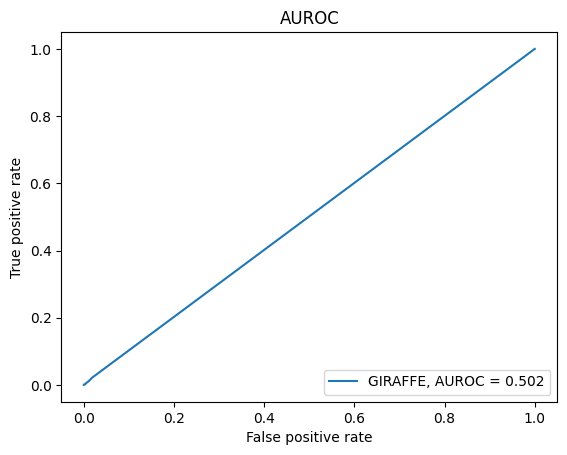

[0.502]

In [31]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), [R_tigress.to_numpy().flatten()], ["GIRAFFE"])

### 2.7. BITFAM [5]

In [11]:
translation = pd.read_csv("data/liver/raw/gen_v26_mapping.csv")
tf_ids = {}
for tf in motif.columns:
    trans = list(translation[translation['gene_name'] == tf]['gene_id'])
    if len(trans) == 0:
        continue
    else:
        trans = trans[0][0:15]
        tf_ids[trans] = tf
R_bitfam = pd.DataFrame(0, index=motif.index, columns=motif.columns)
files = ['1', '3001', '6001', '9001', '12001', '15001', '18001', '21001', '24001', '27001']
for file in files:
    a = pd.read_csv("data/colon/R_bitfam_" + file + ".csv", index_col = 0)
    for tf in a.columns:
        for g in a.index:
            if tf not in tf_ids.keys():
                continue
            R_bitfam.at[g, tf_ids[tf]] = a.at[g, tf]
    print("File done!")

File done!
File done!
File done!
File done!
File done!
File done!
File done!
File done!
File done!
File done!


### Results

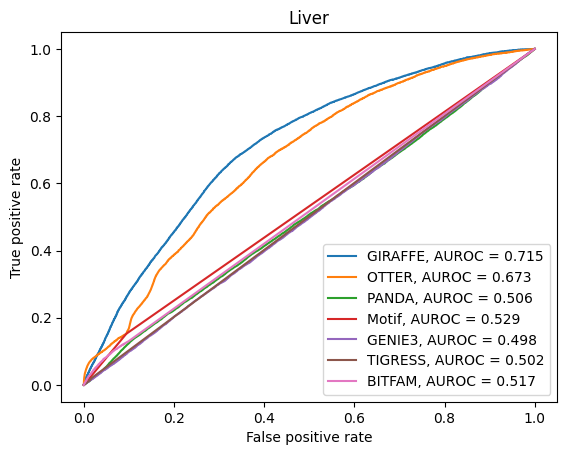

[0.715, 0.673, 0.506, 0.529, 0.498, 0.502, 0.517]

In [11]:
notebooks.utils.plot_auroc(chip.to_numpy().flatten(), 
                          [R_giraffe.to_numpy().flatten(), R_otter.to_numpy().flatten(), R_panda.to_numpy().flatten(), motif.to_numpy().flatten(), R_genie.to_numpy().flatten(), R_tigress.to_numpy().flatten(), R_bitfam.to_numpy().flatten()],
                          ["GIRAFFE", "OTTER", "PANDA", "Motif", "GENIE3", "TIGRESS", "BITFAM"], "Liver")